In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv(r"parkinsonsdatamodeldata.csv")
Data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
print("\nNo. of Duplicate rows in data:", Data.duplicated().sum())



No. of Duplicate rows in data: 0


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Conclusion:

### The given dataset has all the columns with complete data. The response data is in column 'status'. The first column contains the patient code whereas the remaining columns are input variables for data modeling.

## Step 1: Perform an Exploratory Data Analysis on the dataset.

### Let us first analyse response i.e "status" column

In [5]:
Data.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

,count
status,
1,147
0,48


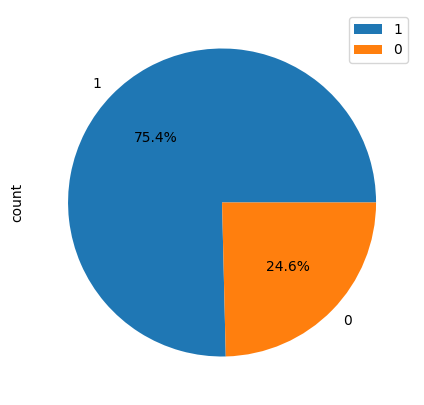

In [6]:
pie_percent = pd.DataFrame(Data['status'].value_counts())
plot = pie_percent.plot.pie(y='count', figsize=(5, 5), autopct='%1.1f%%')
pie_percent

## Conclusion:

### The data is imbalanced because 75.4% of the data is of patients having Parkinsons disease while the rest 24.6% are of people having no Parkinsons disease. We may need to balance the data while creation of prediction model

## Now let us analyse input variable columns

In [7]:
# First we will create a function for generating histogram and box-plot as below
sns.set(style="ticks")
def graphical(x):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(x=x, ax=ax_box)
    sns.histplot(x=x, bins=12, kde=True, stat='density', ax=ax_hist)
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)



In [8]:
df_factors = Data.drop(['name', 'status'], axis=1)
df_factors.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
df_factors.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


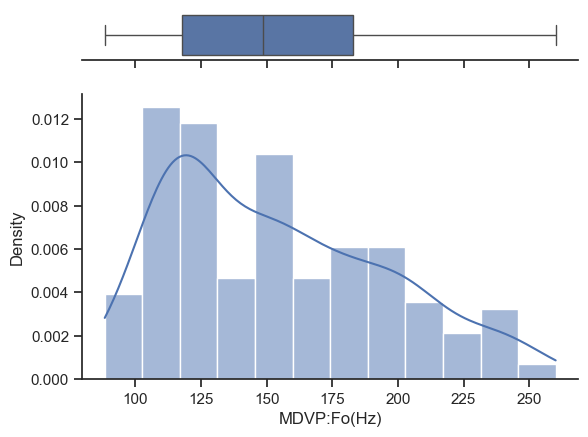

In [10]:
graphical(Data['MDVP:Fo(Hz)'])

## Conclusion:
1. There is no outliers in the data.
2. The data is skewed to the left.

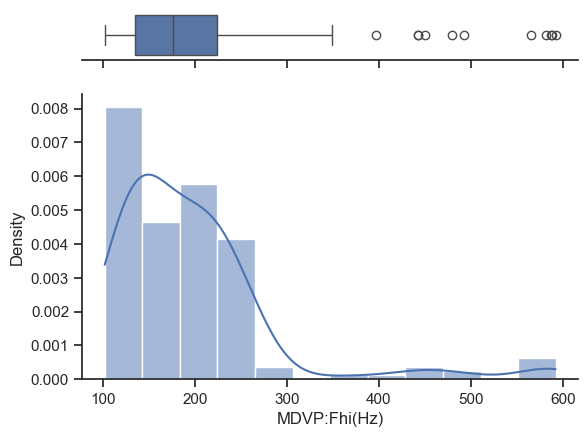

In [11]:
graphical(Data['MDVP:Fhi(Hz)'])

## Conclusion:
1. Data contains outliers.
2. The data is skewed to the left.

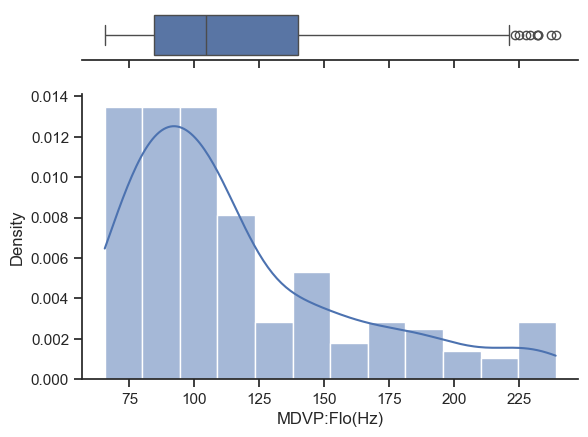

In [12]:
graphical(Data['MDVP:Flo(Hz)'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

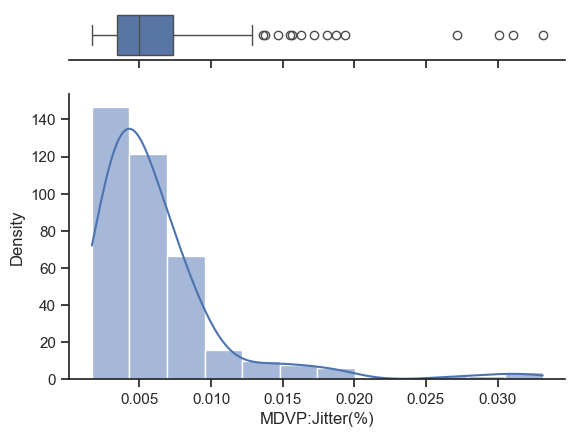

In [13]:
graphical(Data['MDVP:Jitter(%)'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

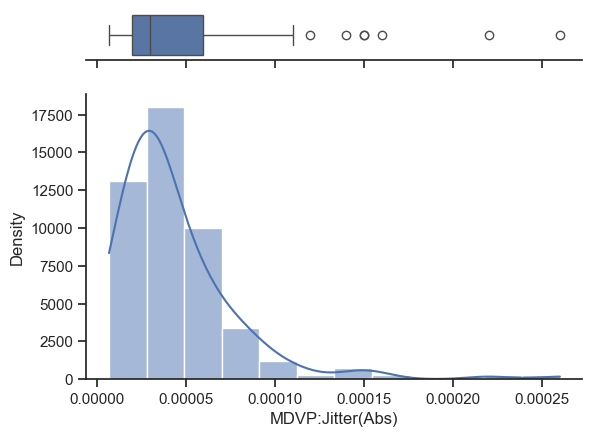

In [14]:
graphical(Data['MDVP:Jitter(Abs)'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

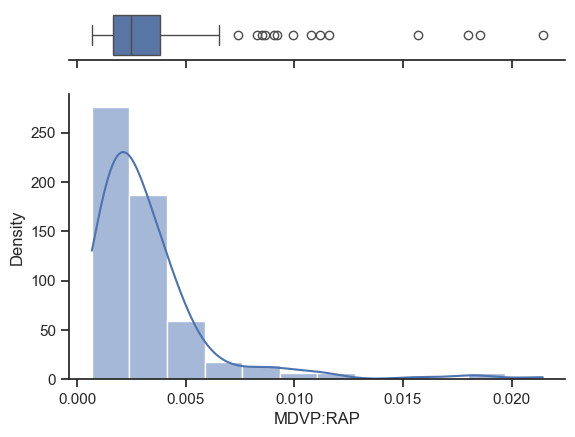

In [15]:
graphical(Data['MDVP:RAP'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

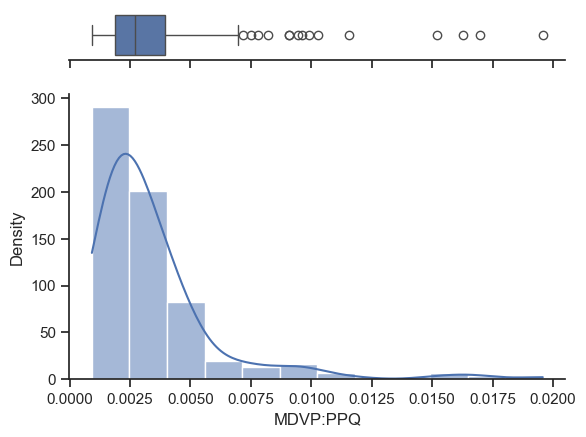

In [16]:
graphical(Data['MDVP:PPQ'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

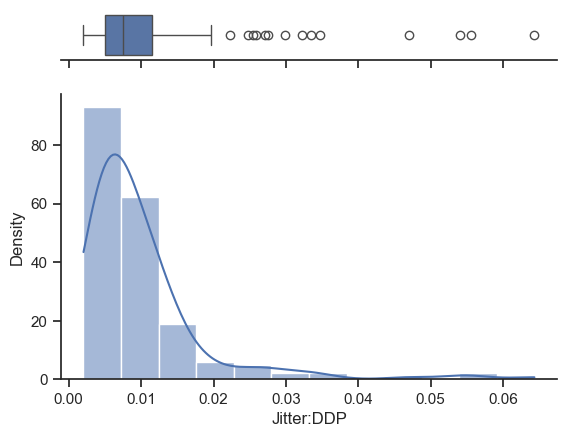

In [17]:
graphical(Data['Jitter:DDP'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

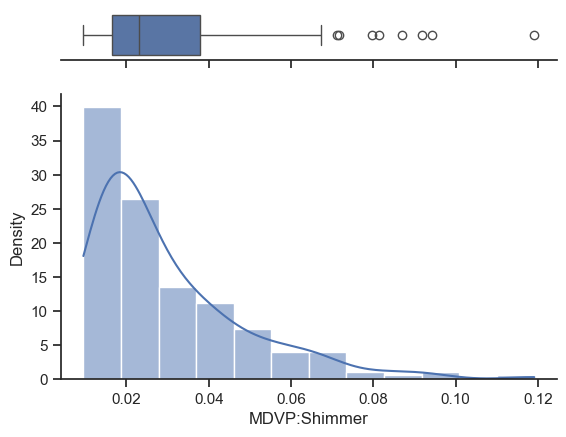

In [18]:
graphical(Data['MDVP:Shimmer'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

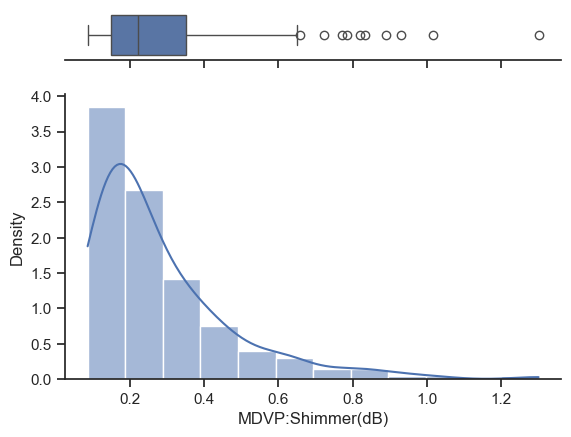

In [19]:
graphical(Data['MDVP:Shimmer(dB)'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

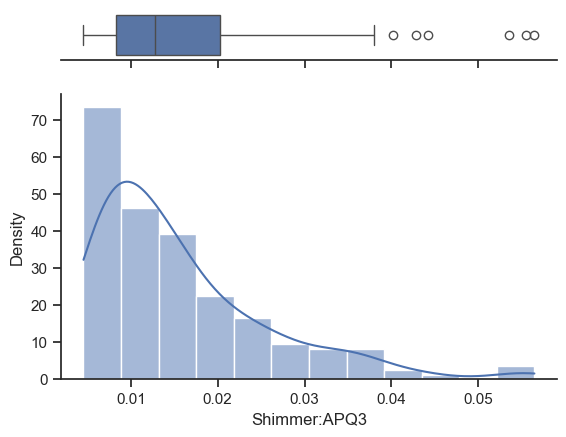

In [20]:
graphical(Data['Shimmer:APQ3'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

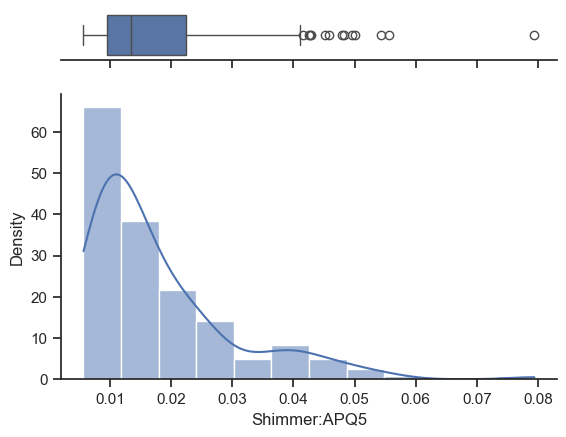

In [21]:
graphical(Data['Shimmer:APQ5'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

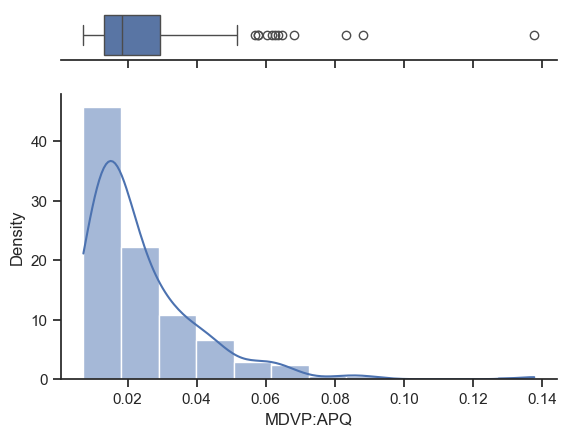

In [22]:
graphical(Data['MDVP:APQ'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

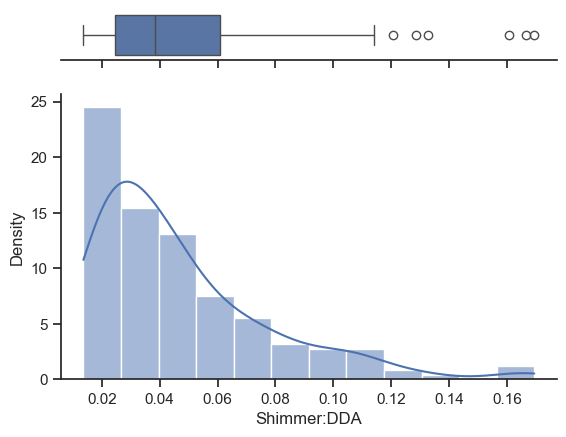

In [23]:
graphical(Data['Shimmer:DDA'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

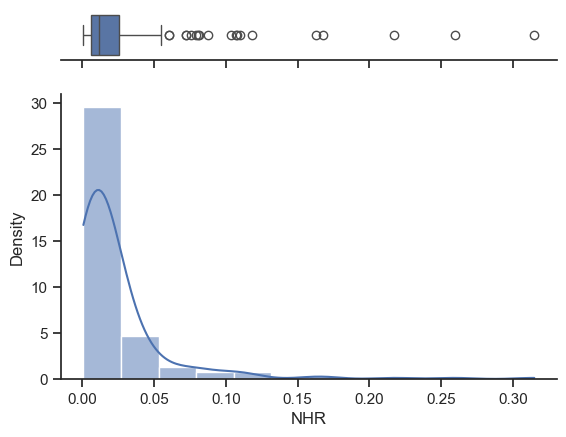

In [24]:
graphical(Data['NHR'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

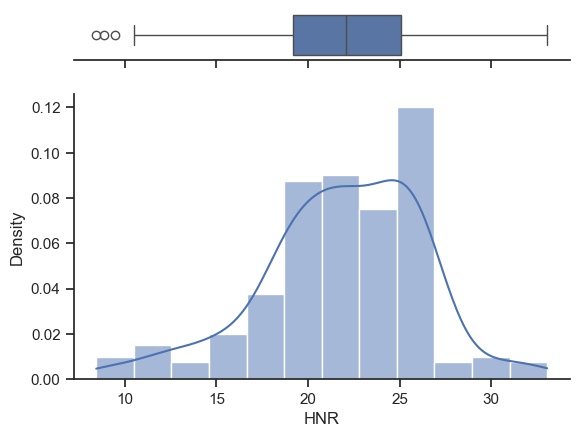

In [25]:
graphical(Data['HNR'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the right.

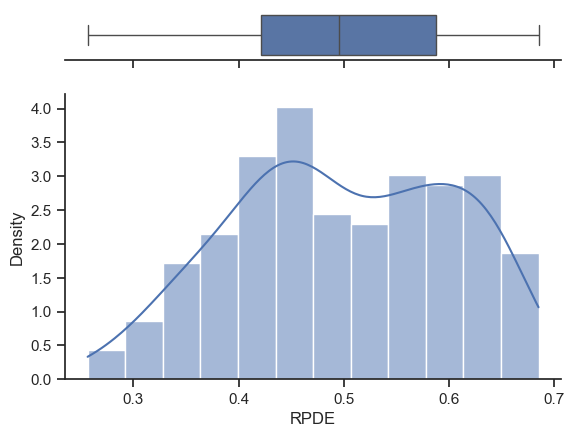

In [26]:
graphical(Data['RPDE'])

## Conclusion:
1. There are no outliers in the data.
2. The data looks normally distributed.
3. The data is multimodal (two peaks).

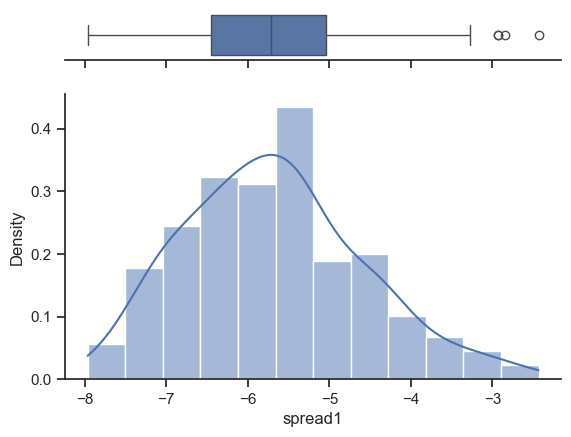

In [27]:
graphical(Data['spread1'])

## Conclusion:
1. The data contains outliers.
2. The data looks normally distributed.

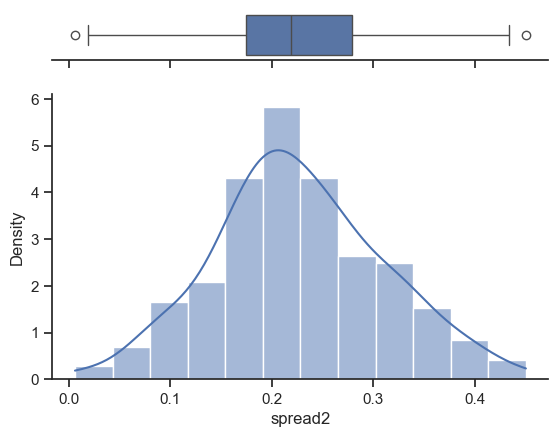

In [28]:
graphical(Data['spread2'])

## Conclusion:
1. The data contains outliers.
2. The data looks normally distributed.

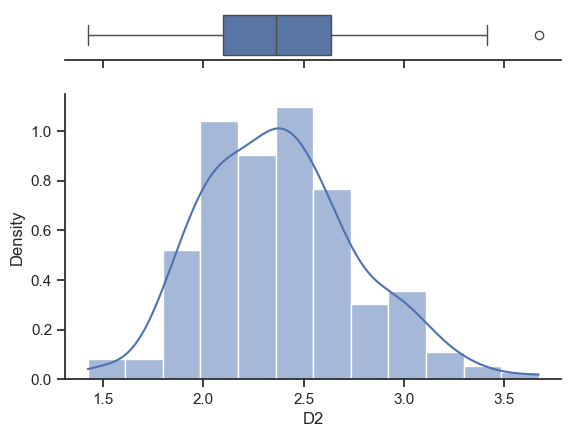

In [29]:
graphical(Data['D2'])

## Conclusion:
1. The data contains an outlier.
2. The data looks normally distributed.

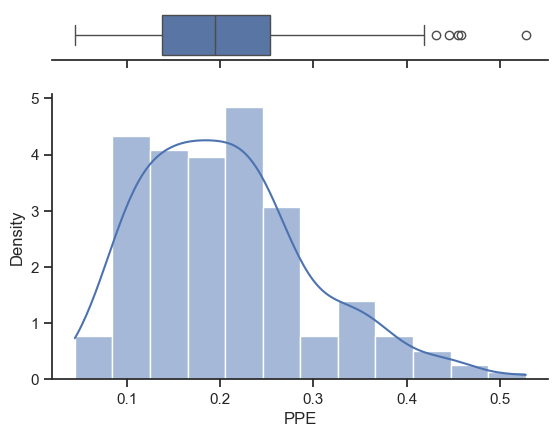

In [30]:
graphical(Data['PPE'])

## Conclusion:
1. The data contains outliers.
2. The data is skewed to the left.

## Let us check the relationship between the input variables using Heatmap:

In [31]:
corr_matrix = df_factors.corr()
corr_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [32]:
from scipy.stats import pearsonr
pvals = pd.DataFrame([[pearsonr(df_factors[c], df_factors[y])[1] for y in df_factors.columns] for c in df_factors.columns], columns=df_factors.columns, index=df_factors.columns)
pvals

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),0.000000e+00,6.282219e-09,3.508989e-20,1.003895e-01,3.570558e-08,2.897420e-01,1.184847e-01,2.896221e-01,1.712483e-01,3.055839e-01,...,2.798272e-01,1.877334e-01,7.603599e-01,4.114664e-01,3.023501e-08,6.382812e-11,1.832868e-09,4.368751e-04,1.280033e-02,8.310494e-08
MDVP:Fhi(Hz),6.282219e-09,0.000000e+00,2.376867e-01,1.555769e-01,6.853323e-01,1.765437e-01,2.051680e-01,1.766634e-01,9.747505e-01,5.462819e-01,...,9.453889e-01,9.586944e-01,2.215866e-02,7.297693e-01,1.177001e-01,9.100823e-07,2.868063e-01,9.673119e-01,1.367329e-02,3.340233e-01
MDVP:Flo(Hz),3.508989e-20,2.376867e-01,0.000000e+00,5.106814e-02,8.416287e-05,1.620545e-01,1.826513e-01,1.621873e-01,4.379366e-02,9.727771e-02,...,1.354499e-01,3.542868e-02,1.304764e-01,3.088604e-03,6.801912e-09,4.840489e-01,1.114893e-08,5.925682e-04,1.615942e-01,1.150013e-06
MDVP:Jitter(%),1.003895e-01,1.555769e-01,5.106814e-02,0.000000e+00,2.822016e-89,2.733690e-167,8.051125e-127,2.716732e-167,2.266875e-39,1.683971e-45,...,1.050781e-37,5.221228e-36,2.141514e-74,1.705488e-33,2.224220e-07,1.703810e-01,2.659839e-29,2.708336e-08,2.464038e-10,1.212142e-32
MDVP:Jitter(Abs),3.570558e-08,6.853323e-01,8.416287e-05,2.822016e-89,0.000000e+00,6.164495e-82,1.193017e-70,6.149211e-82,2.017562e-30,5.049306e-32,...,1.113822e-24,1.040301e-29,5.894911e-52,1.893295e-25,1.005472e-10,1.438693e-02,1.663465e-34,1.989371e-08,9.841979e-06,3.164110e-36
MDVP:RAP,2.897420e-01,1.765437e-01,1.620545e-01,2.733690e-167,6.164495e-82,0.000000e+00,5.525189e-106,0.000000e+00,6.636832e-38,5.480111e-43,...,9.860098e-35,9.129362e-36,3.320902e-80,1.212061e-32,9.802554e-07,3.734484e-01,1.232578e-24,3.715011e-06,5.013868e-10,7.176746e-27
MDVP:PPQ,1.184847e-01,2.051680e-01,1.826513e-01,8.051125e-127,1.193017e-70,5.525189e-106,0.000000e+00,5.497566e-106,2.760985e-44,5.858930e-53,...,1.799013e-45,1.621632e-38,2.915876e-54,6.194108e-34,1.928143e-06,5.952473e-03,5.214389e-32,3.335741e-09,2.065618e-09,1.831519e-39
Jitter:DDP,2.896221e-01,1.766634e-01,1.621873e-01,2.716732e-167,6.149211e-82,0.000000e+00,5.497566e-106,0.000000e+00,6.696706e-38,5.549786e-43,...,9.909627e-35,9.184623e-36,3.217607e-80,1.229442e-32,9.848482e-07,3.738716e-01,1.232636e-24,3.723222e-06,5.039526e-10,7.166195e-27
MDVP:Shimmer,1.712483e-01,9.747505e-01,4.379366e-02,2.266875e-39,2.017562e-30,6.636832e-38,2.760985e-44,6.696706e-38,0.000000e+00,5.031303e-156,...,1.418360e-99,3.031381e-157,1.001968e-32,5.026519e-52,5.466773e-11,2.550468e-02,3.010916e-25,3.281523e-11,3.889623e-14,2.529260e-29
MDVP:Shimmer(dB),3.055839e-01,5.462819e-01,9.727771e-02,1.683971e-45,5.049306e-32,5.480111e-43,5.858930e-53,5.549786e-43,5.031303e-156,0.000000e+00,...,1.153539e-109,4.448336e-112,1.053479e-35,2.464851e-50,2.473489e-09,2.103663e-02,4.890798e-25,2.538279e-11,1.944342e-14,1.809200e-29


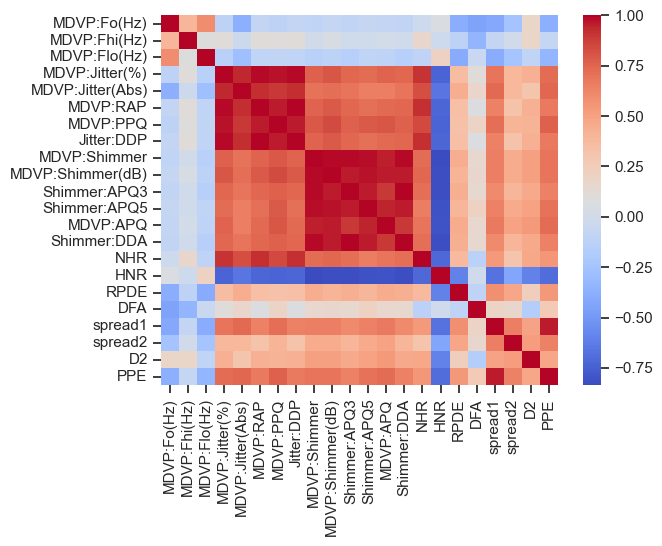

In [33]:
corr_matrix = df_factors.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
sns.set (rc = {'figure.figsize':(18, 12)})
plt.show()

## Conclusion:
The input variables are highly co-related with each other as given below:
1. MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ and JitterDDP are highly positively correlated with each other.
2. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA are highly positively correlated with each other.
3. HNR is highly negatively correlated with MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, JitterDDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, spread1, D2 and PPE (Almost all variables).
4. spread1 is highly positively correlated with PPE.
5. spread2 is positively correlated with PPE.

Since we have large number of input variables (22 in total) and many of them are correlated with each other; we have to consider only significant variables for building prediction model.
   

## Step 2: Let us check significance of each input variable w.r.t. column 'status'

In [34]:
import scipy.stats as stats
def GetStats(C):
    sns.boxplot(x='status', y=C, data=Data)
    df = Data[['status',C]]
    P_yes = np.array(df.query("status==1")[C])
    P_no = np.array(df.query("status==0")[C])
    if np.var(P_yes) > np.var(P_no):
        ratio = np.var(P_yes)/ np.var(P_no)
    else:
        ratio = np.var(P_no)/ np.var(P_yes)
    print("Variance ratio is =", ratio)
    a = stats.ttest_ind(a=P_yes, b=P_no, equal_var=True)
    b = stats.ttest_ind(a=P_yes, b=P_no, equal_var=False)
    print("T-statitstics is: ", a)
    print("Welch T-statitstics is: ", b)

Variance ratio is = 2.6197389160759705
T-statitstics is:  TtestResult(statistic=-5.769452074779698, pvalue=3.1219194028363605e-08, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=-4.557505823379481, pvalue=2.6577816634406917e-05, df=58.97390133896531)


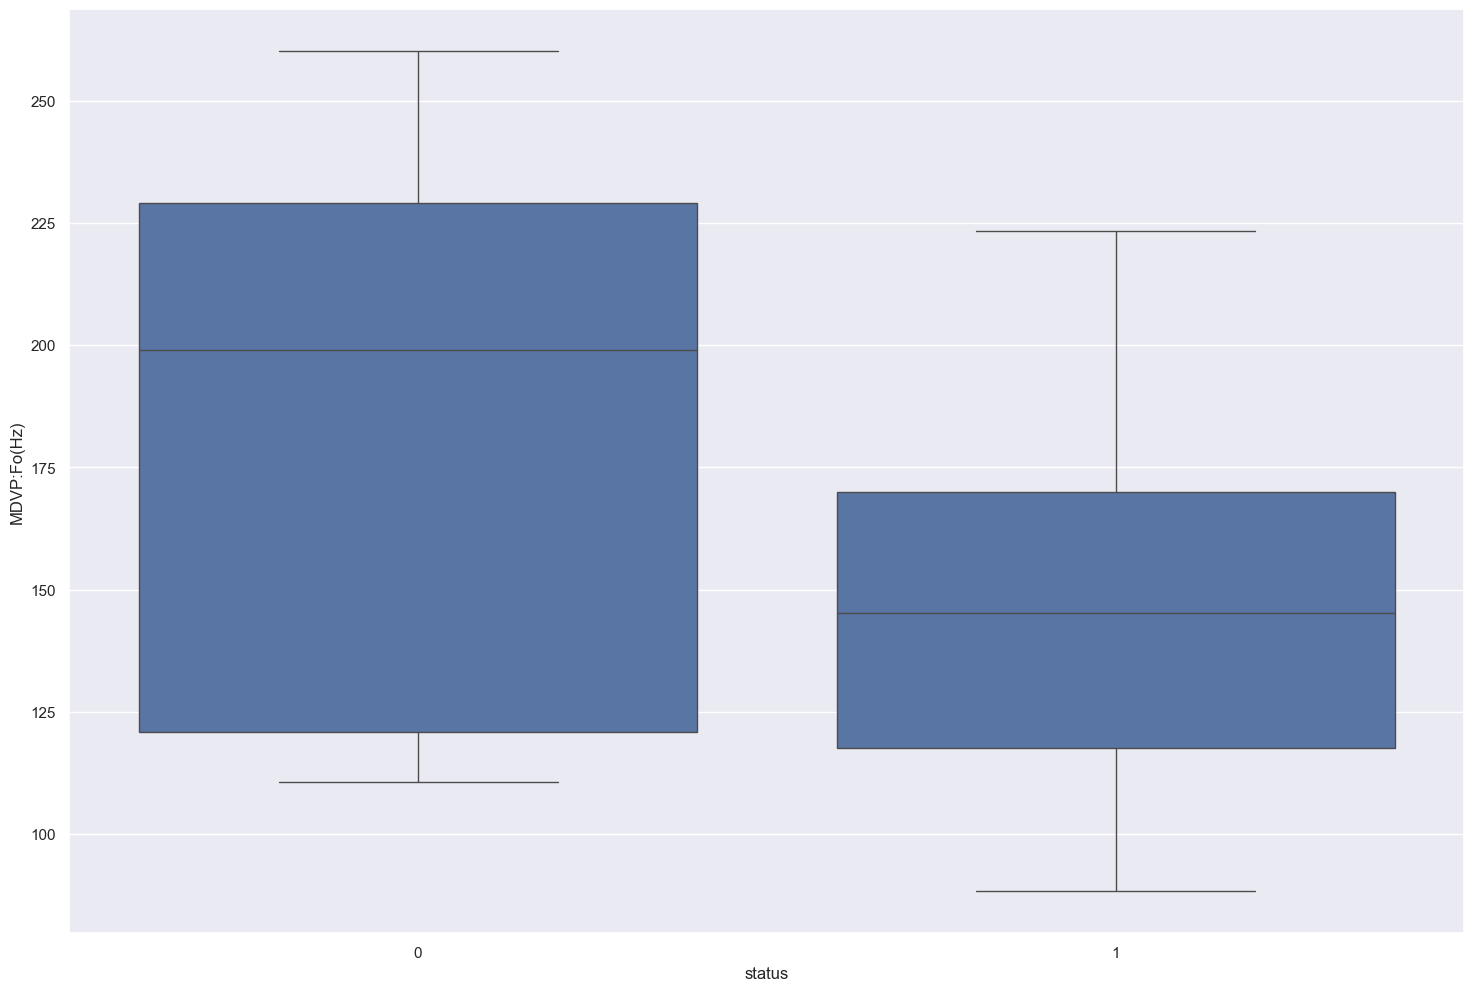

In [35]:
GetStats('MDVP:Fo(Hz)')

## Conclusion:
For variable `MDVP:Fo(Hz)`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 1.1819807795987372
T-statitstics is:  TtestResult(statistic=-2.3405672508312865, pvalue=0.020275669142798675, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=-2.2348740190029197, pvalue=0.0284310621912544, df=74.31312800591235)


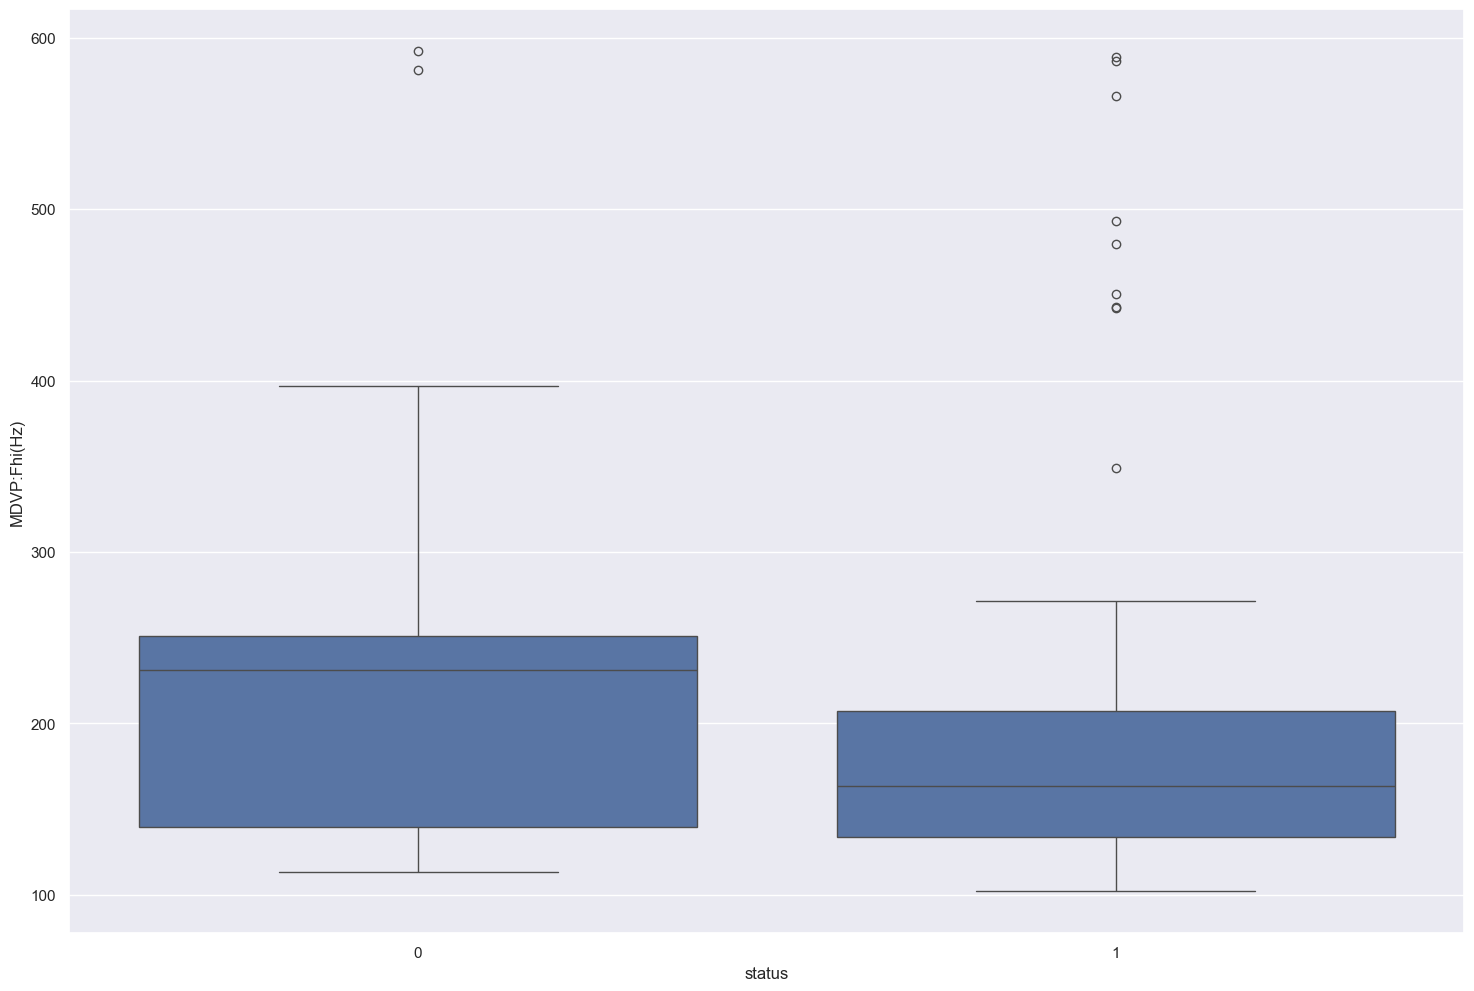

In [36]:
GetStats('MDVP:Fhi(Hz)')

## Conclusion:
For variable `MDVP:Fhi(Hz)`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 3.26757937691391
T-statitstics is:  TtestResult(statistic=-5.71076835971258, pvalue=4.1970041821534524e-08, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=-4.310337004249929, pvalue=6.58543381422862e-05, df=56.54028000952182)


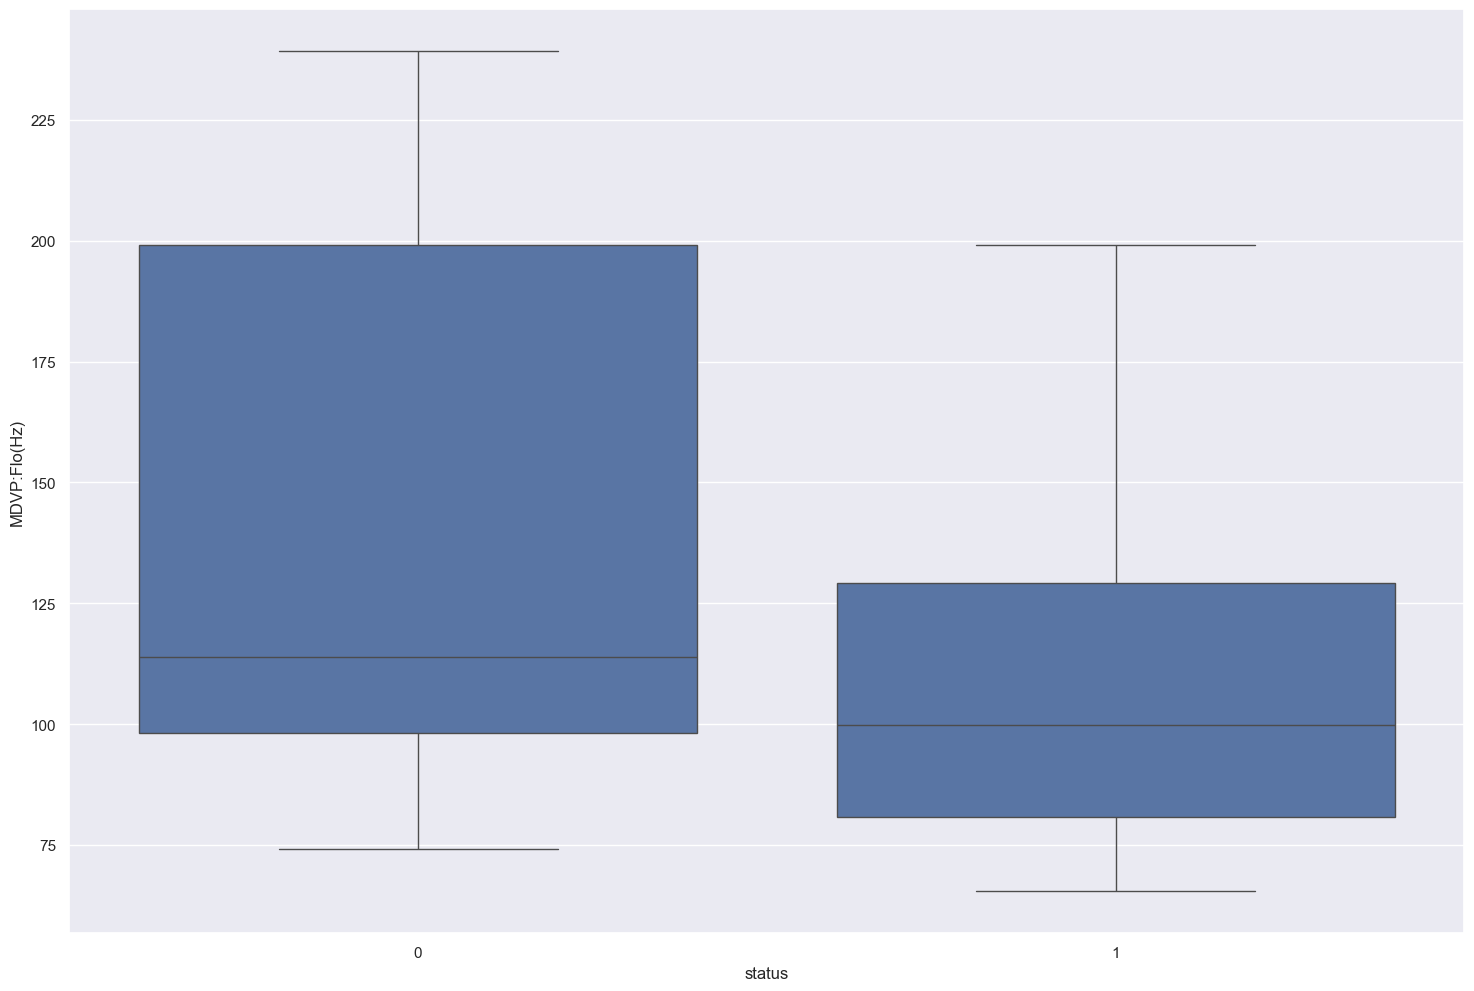

In [37]:
GetStats('MDVP:Flo(Hz)')

## Conclusion:
For variable `MDVP:Flo(Hz)`:
1. Variance between Parkinson and Non-parkinson patient is same.
3. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 6.596930152740326
T-statitstics is:  TtestResult(statistic=4.024028934827969, pvalue=8.209989250843874e-05, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=5.958777231797448, pvalue=1.238819533328091e-08, df=187.04056992894354)


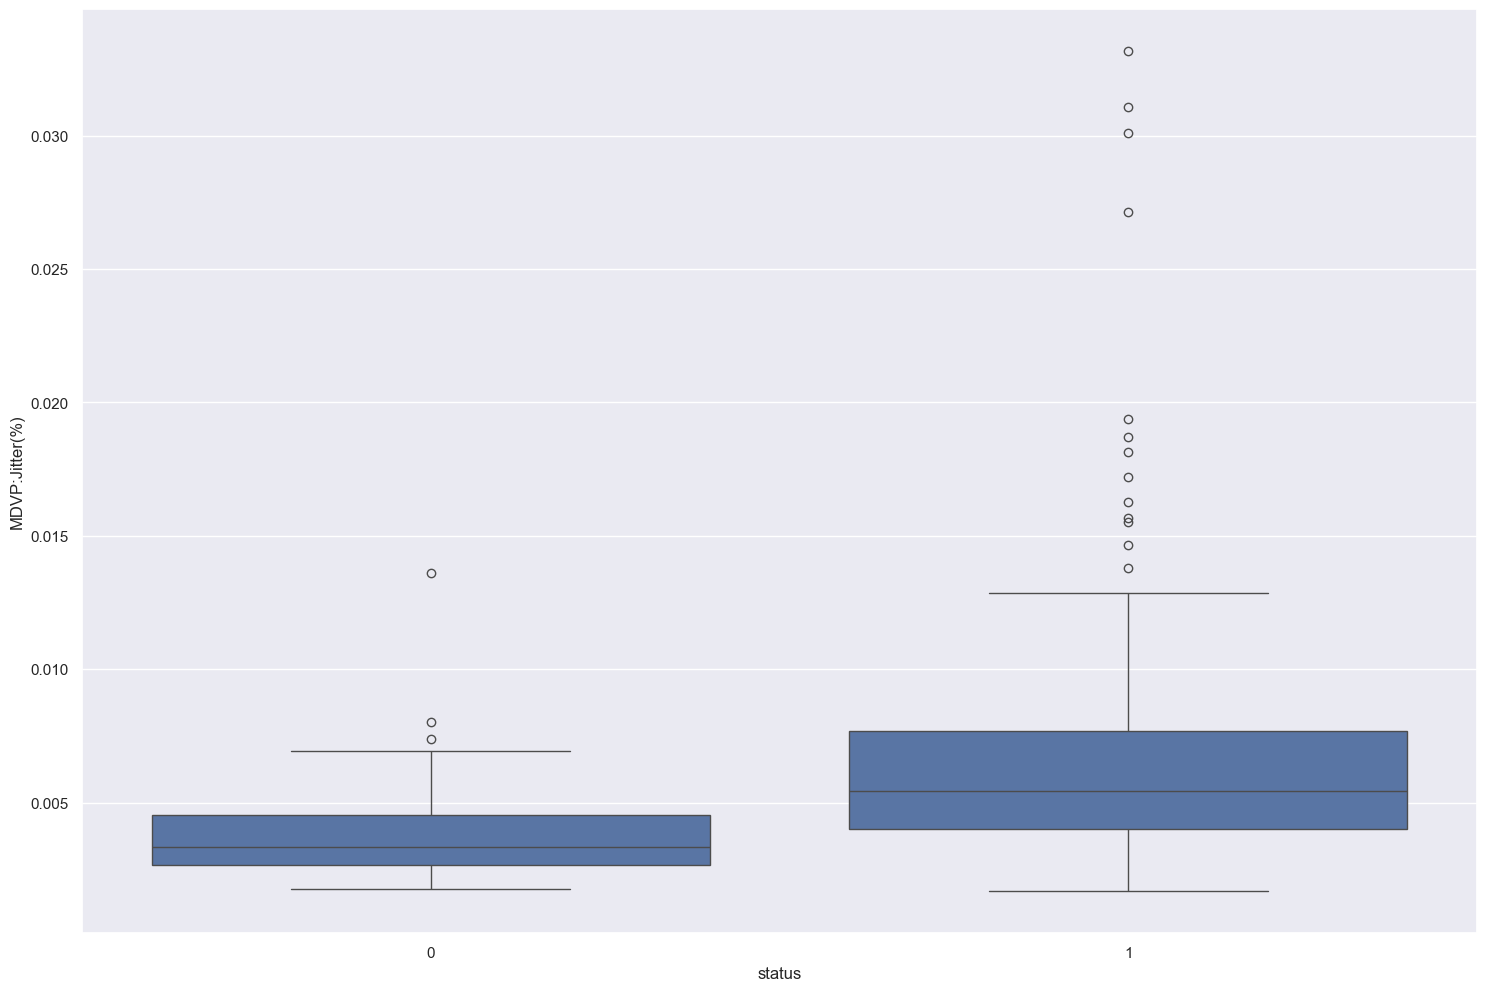

In [38]:
GetStats('MDVP:Jitter(%)')

## Conclusion:
For variable `MDVP:Jitter(%)`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 6.133182182927302
T-statitstics is:  TtestResult(statistic=5.0001729009416085, pvalue=1.2822523240682497e-06, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=7.329263249056702, pvalue=7.031182618262291e-12, df=184.40171958992732)


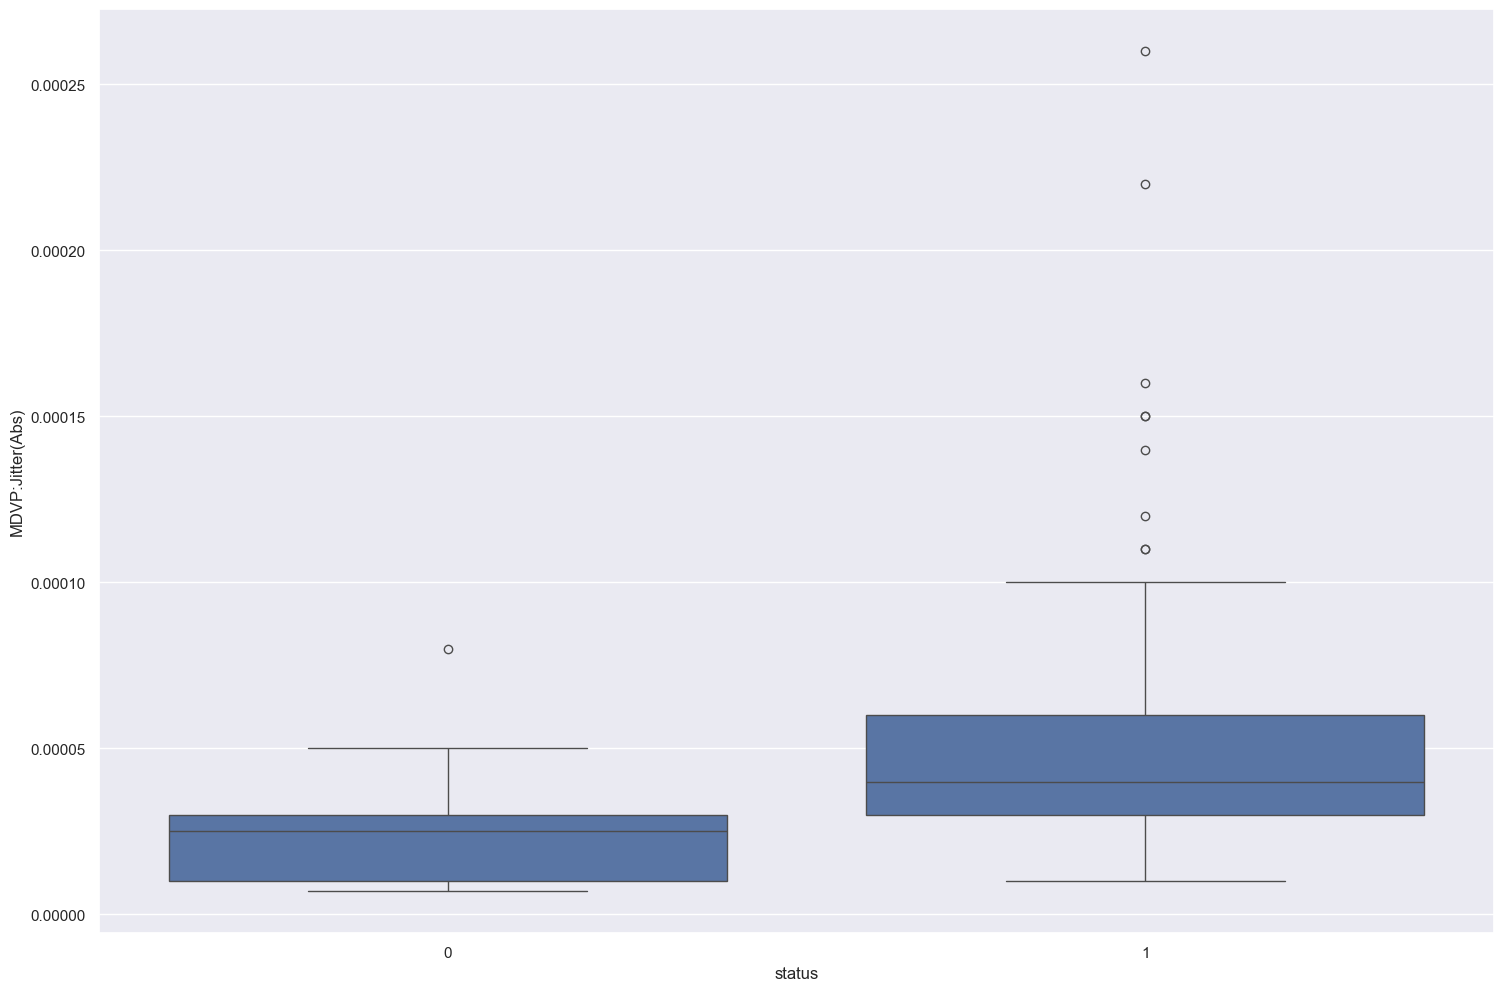

In [39]:
GetStats('MDVP:Jitter(Abs)')

## Conclusion:
For variable `MDVP:Jitter(Abs)`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 9.37391732442456
T-statitstics is:  TtestResult(statistic=3.8438555872630378, pvalue=0.00016433934101953084, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=5.940799565608841, pvalue=1.3013320358186301e-08, df=192.969685466296)


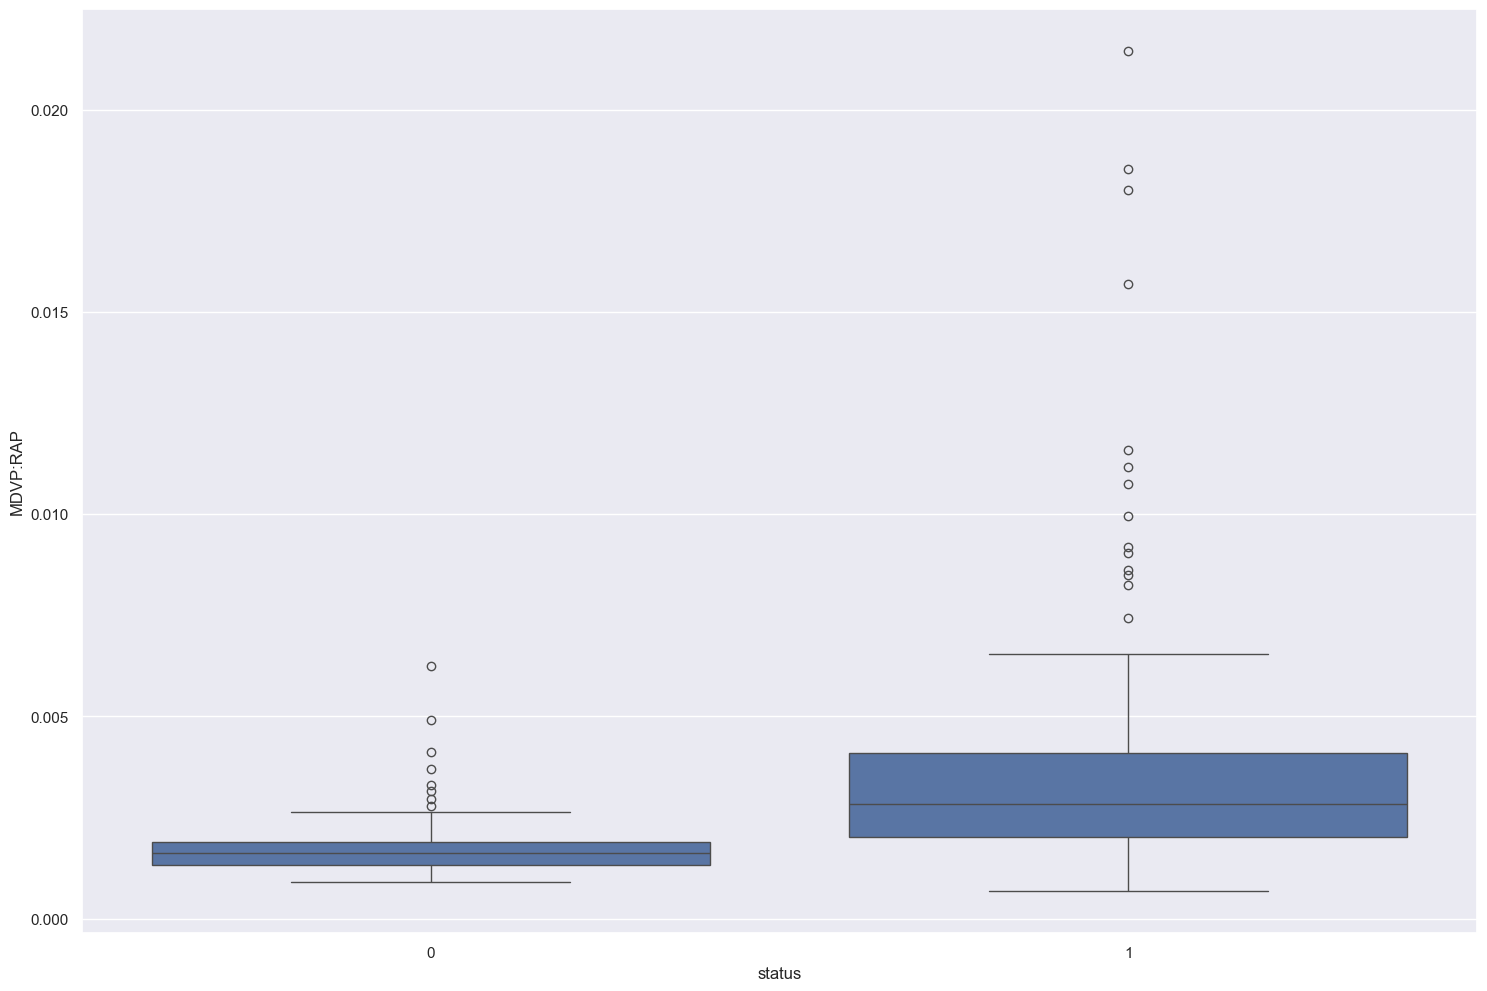

In [40]:
GetStats('MDVP:RAP')

## Conclusion:
For variable `MDVP:RAP`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 10.243152731991083
T-statitstics is:  TtestResult(statistic=4.18909690180653, pvalue=4.2577665232618315e-05, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=6.534506201488432, pvalue=5.548356974144104e-10, df=192.8772588855395)


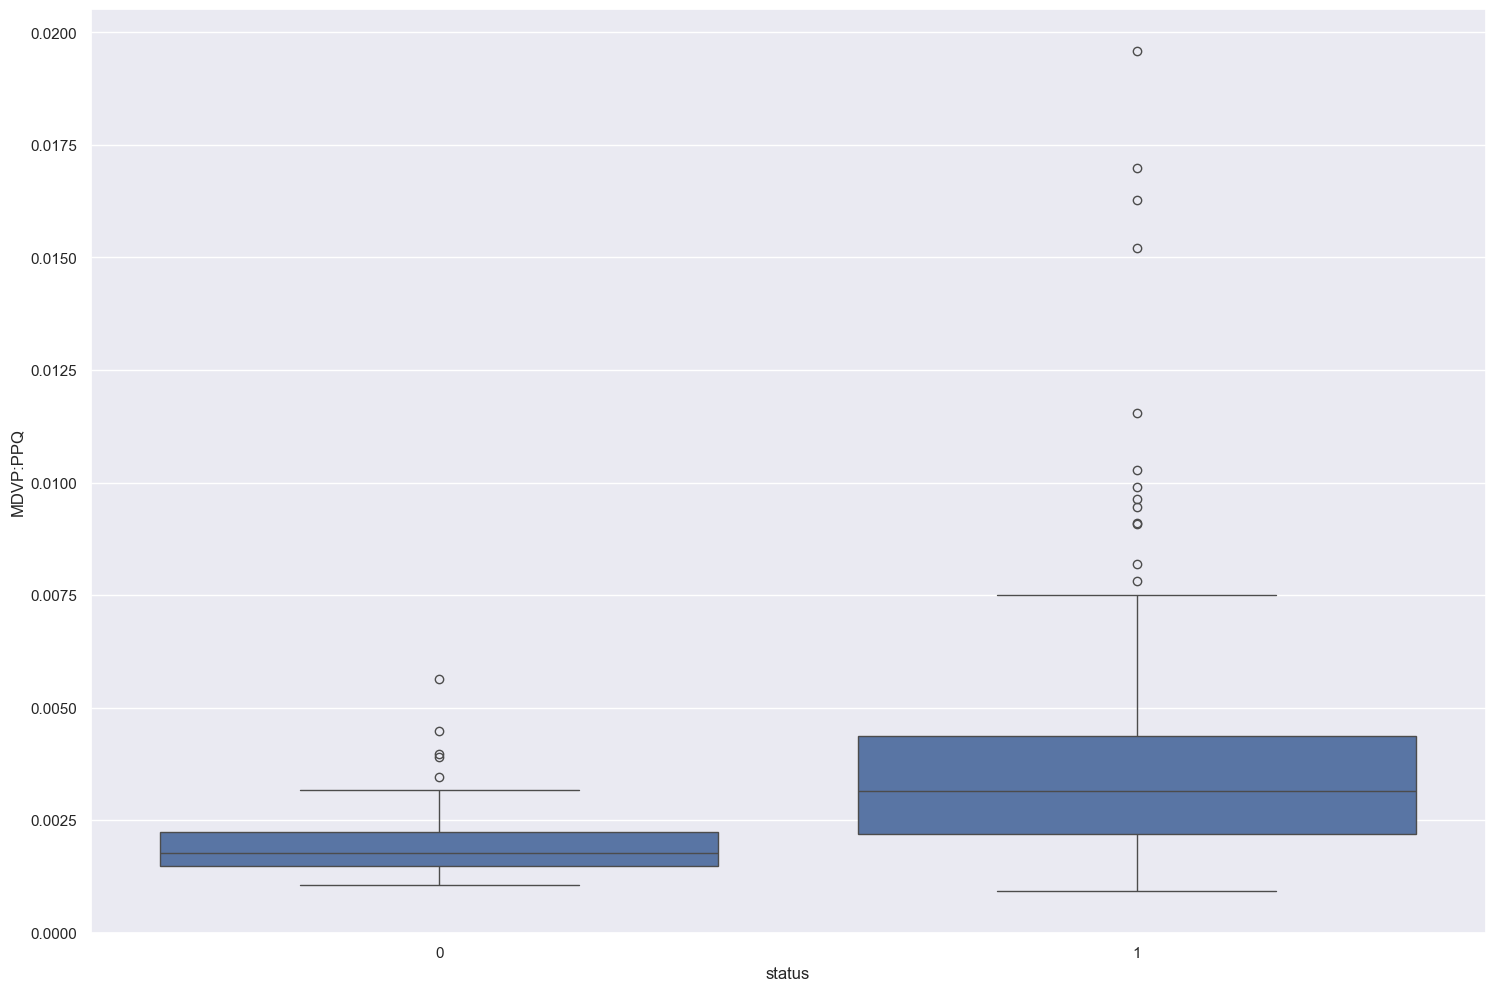

In [41]:
GetStats('MDVP:PPQ')

## Conclusion:
For variable `MDVP:PPQ`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 9.369083265337043
T-statitstics is:  TtestResult(statistic=3.84352253986853, pvalue=0.00016454664474031255, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=5.939955012330668, pvalue=1.3070211648739269e-08, df=192.9685889323236)


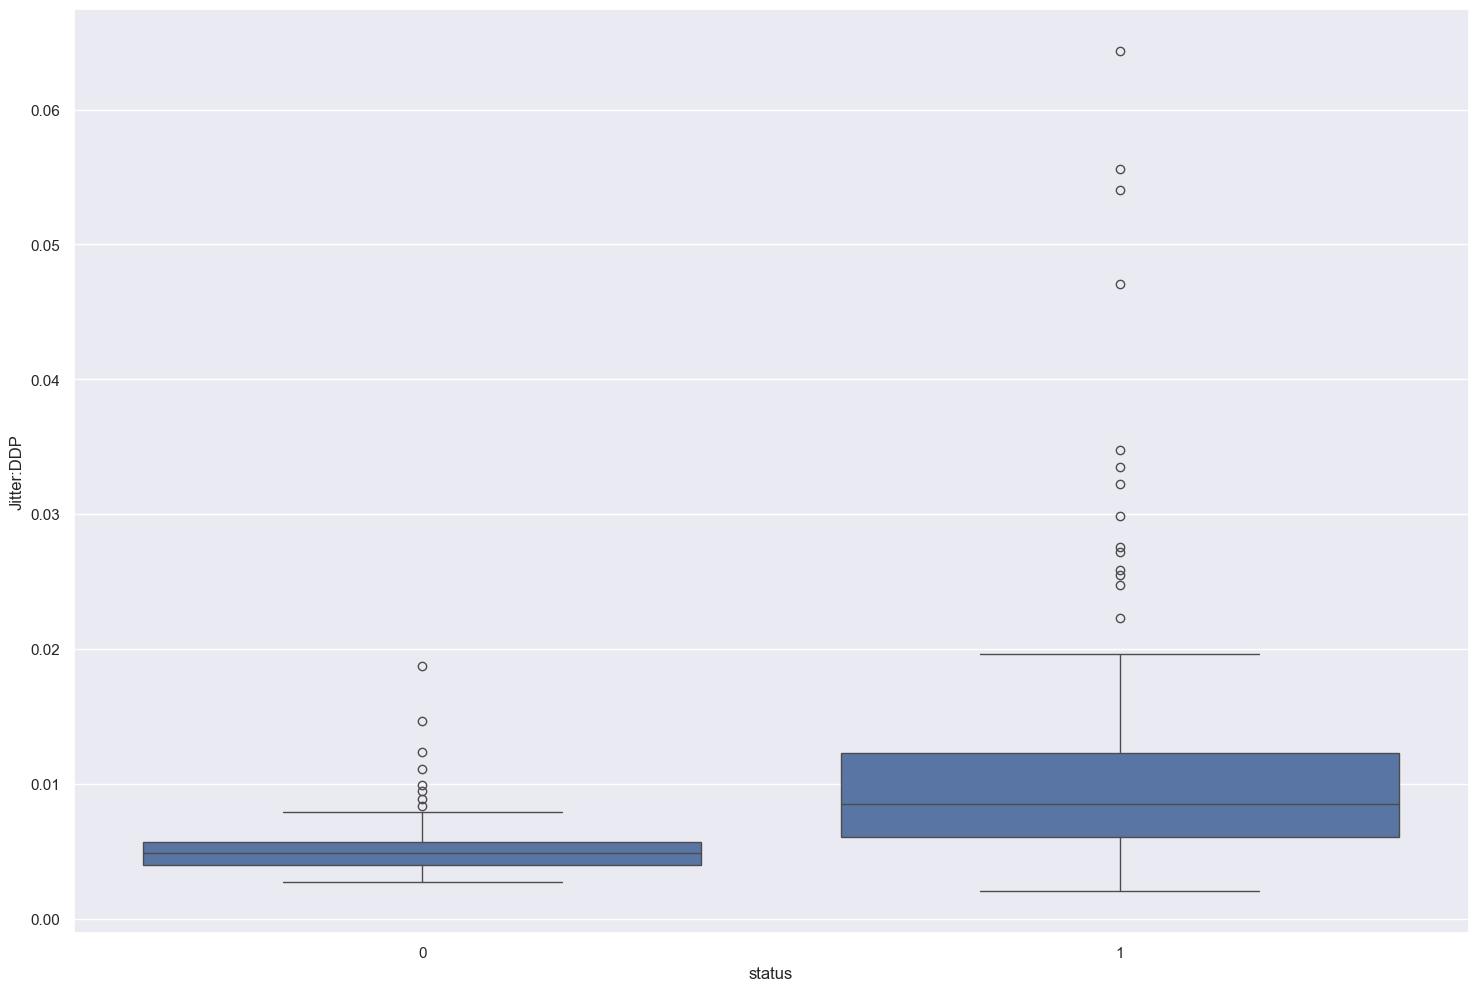

In [42]:
GetStats('Jitter:DDP')

## Conclusion:
For variable `MDVP:Jitter(%)`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 13.15904355868925
T-statitstics is:  TtestResult(statistic=5.488405973182032, pvalue=1.2647022896752548e-07, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=8.76077812269068, pvalue=1.0637008986131896e-15, df=190.15039877125542)


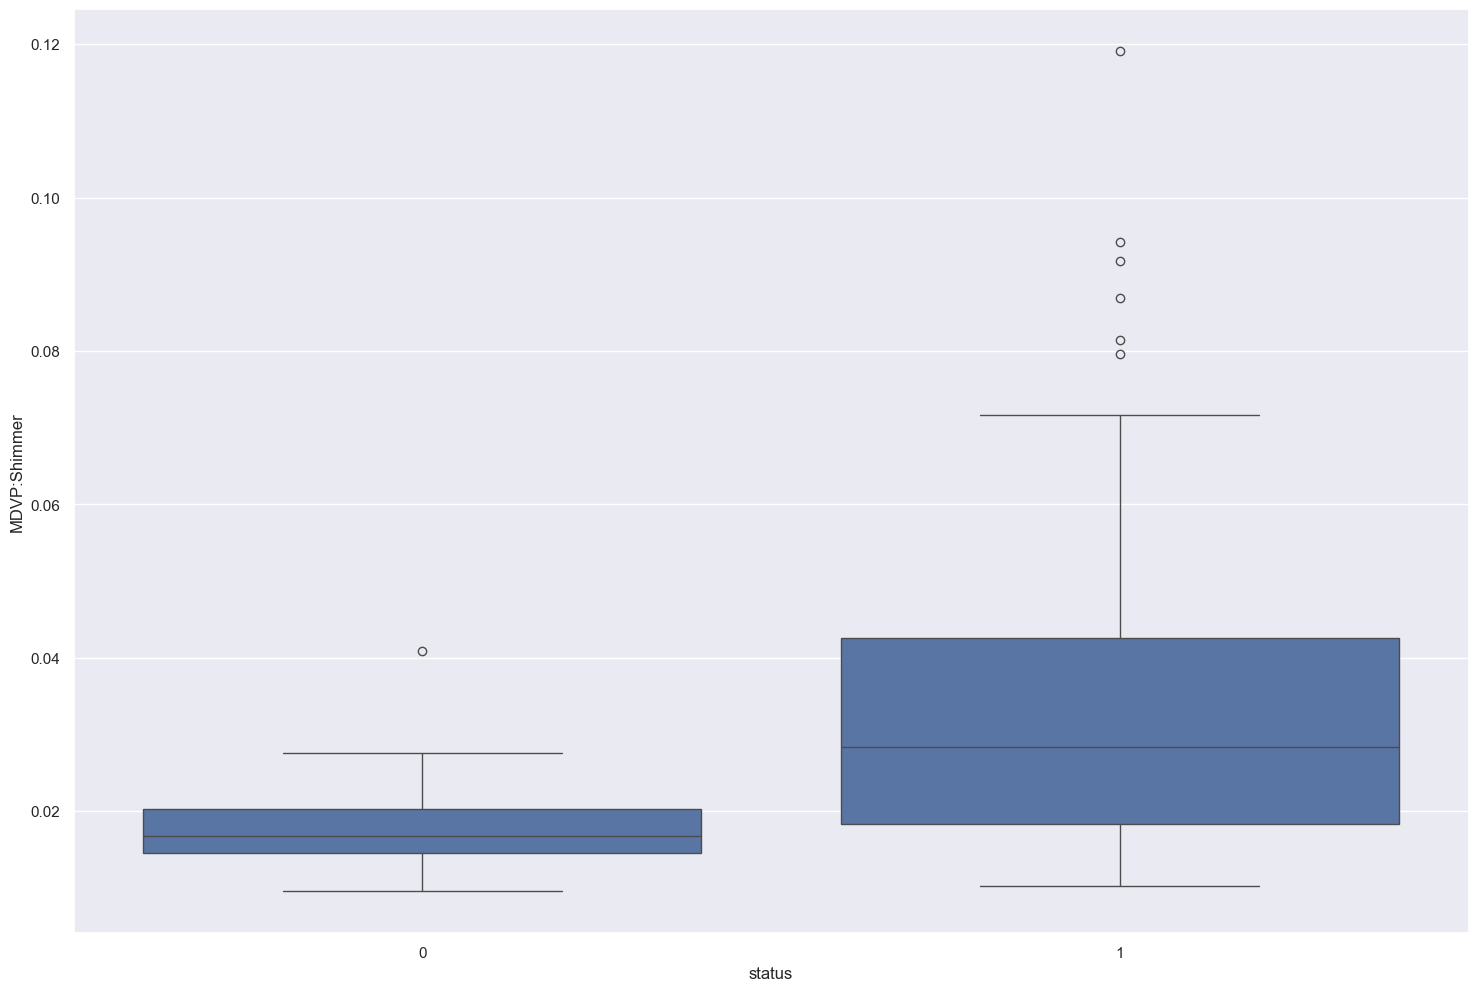

In [43]:
GetStats('MDVP:Shimmer')

## Conclusion:
For variable `MDVP:Shimmer`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 13.100097343702414
T-statitstics is:  TtestResult(statistic=5.202449818137898, pvalue=5.000743178590638e-07, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=8.301211605363125, pvalue=1.8778355183621347e-14, df=190.22417007392076)


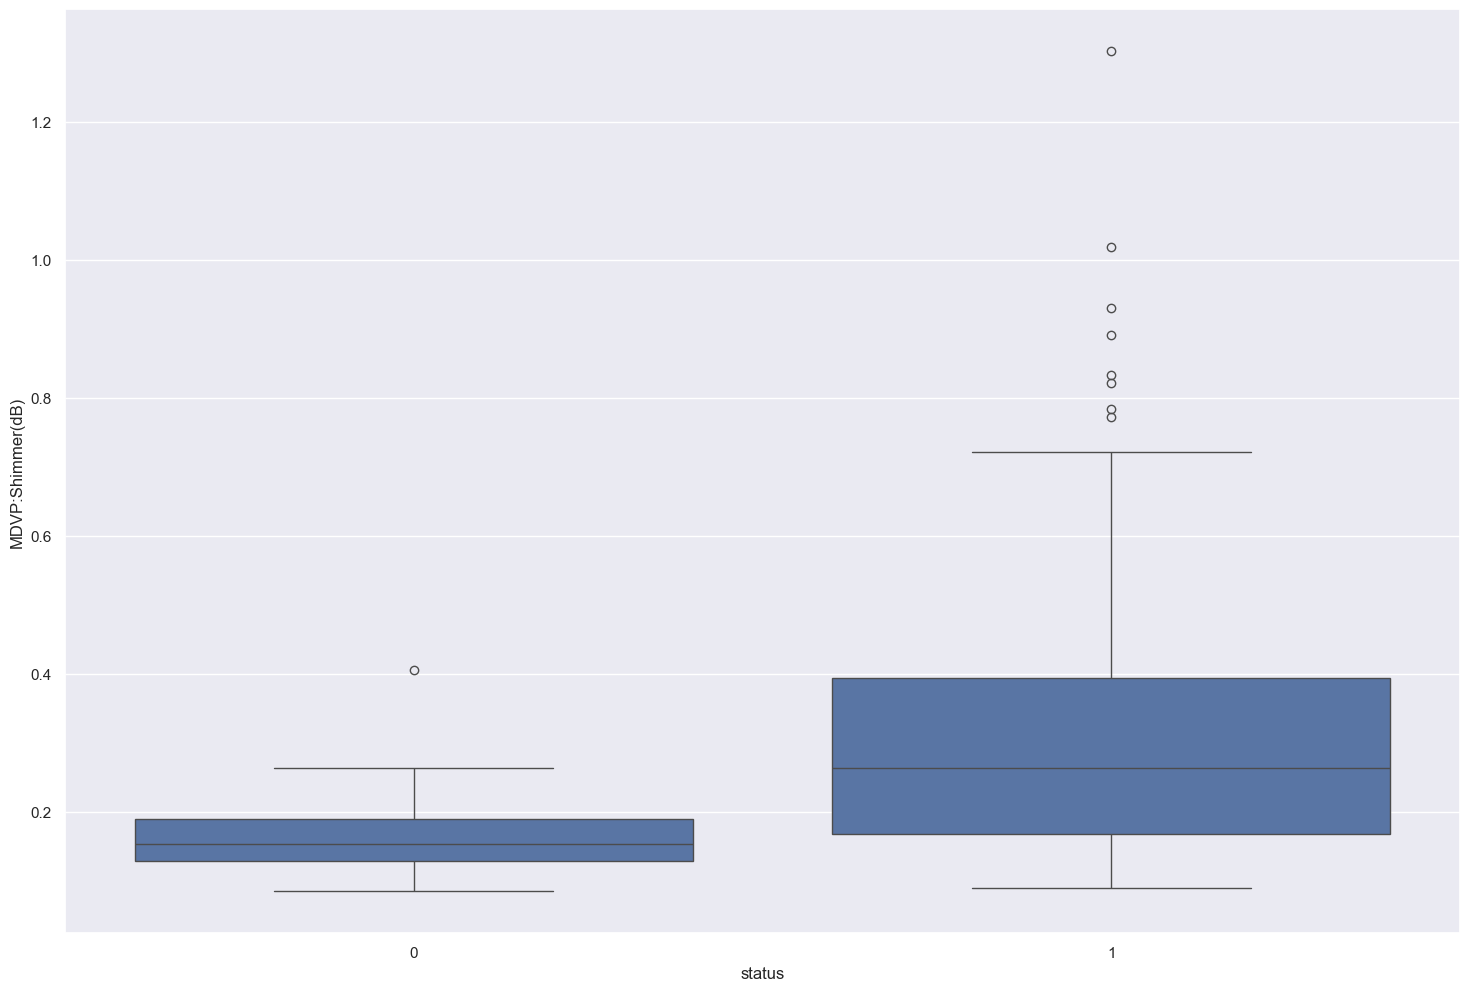

In [44]:
GetStats('MDVP:Shimmer(dB)')

## Conclusion:
For variable `MDVP:Shimmer(dB)`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 9.900370560104694
T-statitstics is:  TtestResult(statistic=5.150448560571447, pvalue=6.386194089451473e-07, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=8.006212050453874, pvalue=1.085105041629818e-13, df=192.97691058426068)


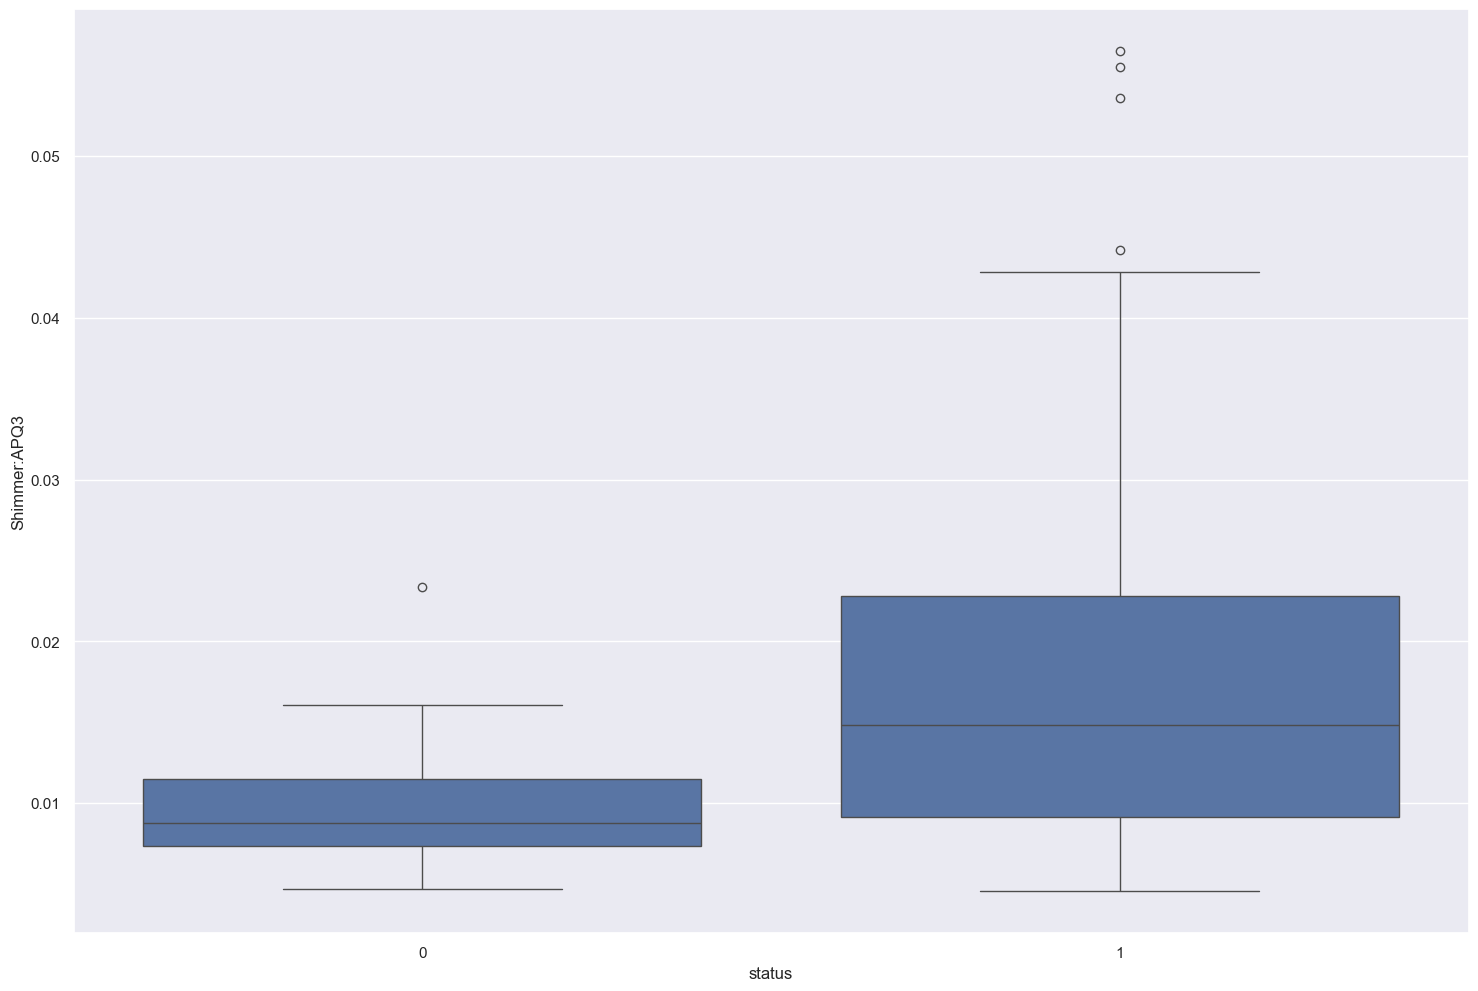

In [45]:
GetStats('Shimmer:APQ3')

## Conclusion:
For variable `Shimmer:APQ3`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 16.036197852736667
T-statitstics is:  TtestResult(statistic=5.210089496996556, pvalue=4.823575144885649e-07, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=8.444370128975546, pvalue=8.484820319537496e-15, df=186.32350184315845)


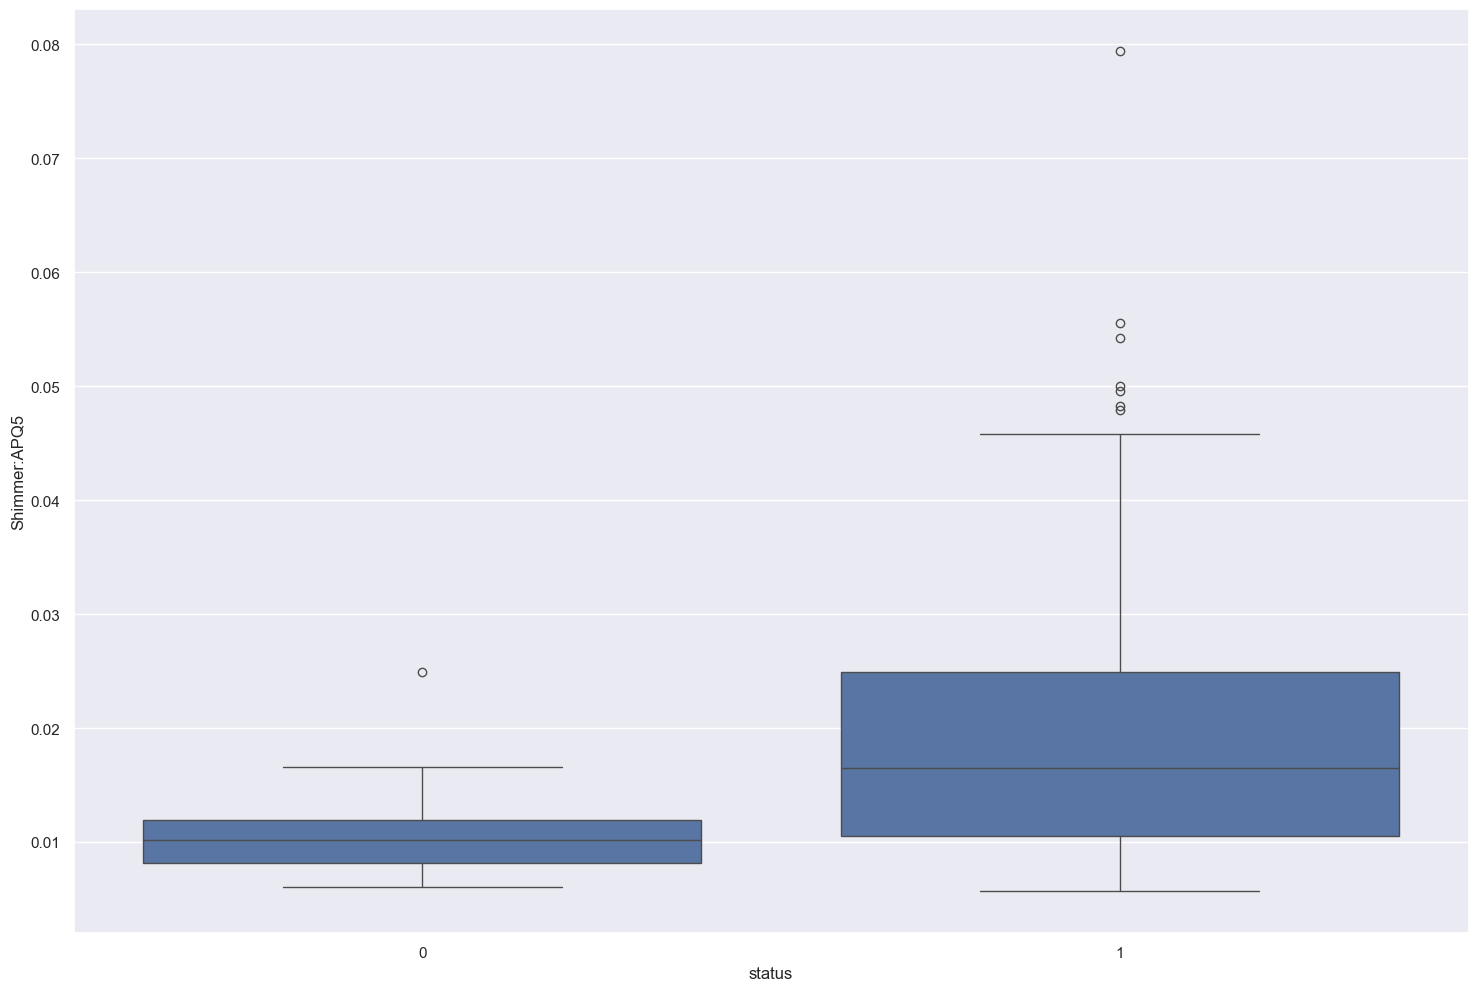

In [46]:
GetStats('Shimmer:APQ5')

## Conclusion:
For variable `Shimmer:APQ5`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 22.6172750326948
T-statitstics is:  TtestResult(statistic=5.434735526339116, pvalue=1.6432377654660208e-07, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=8.9978601535921, pvalue=3.367272621197868e-16, df=178.4048232759076)


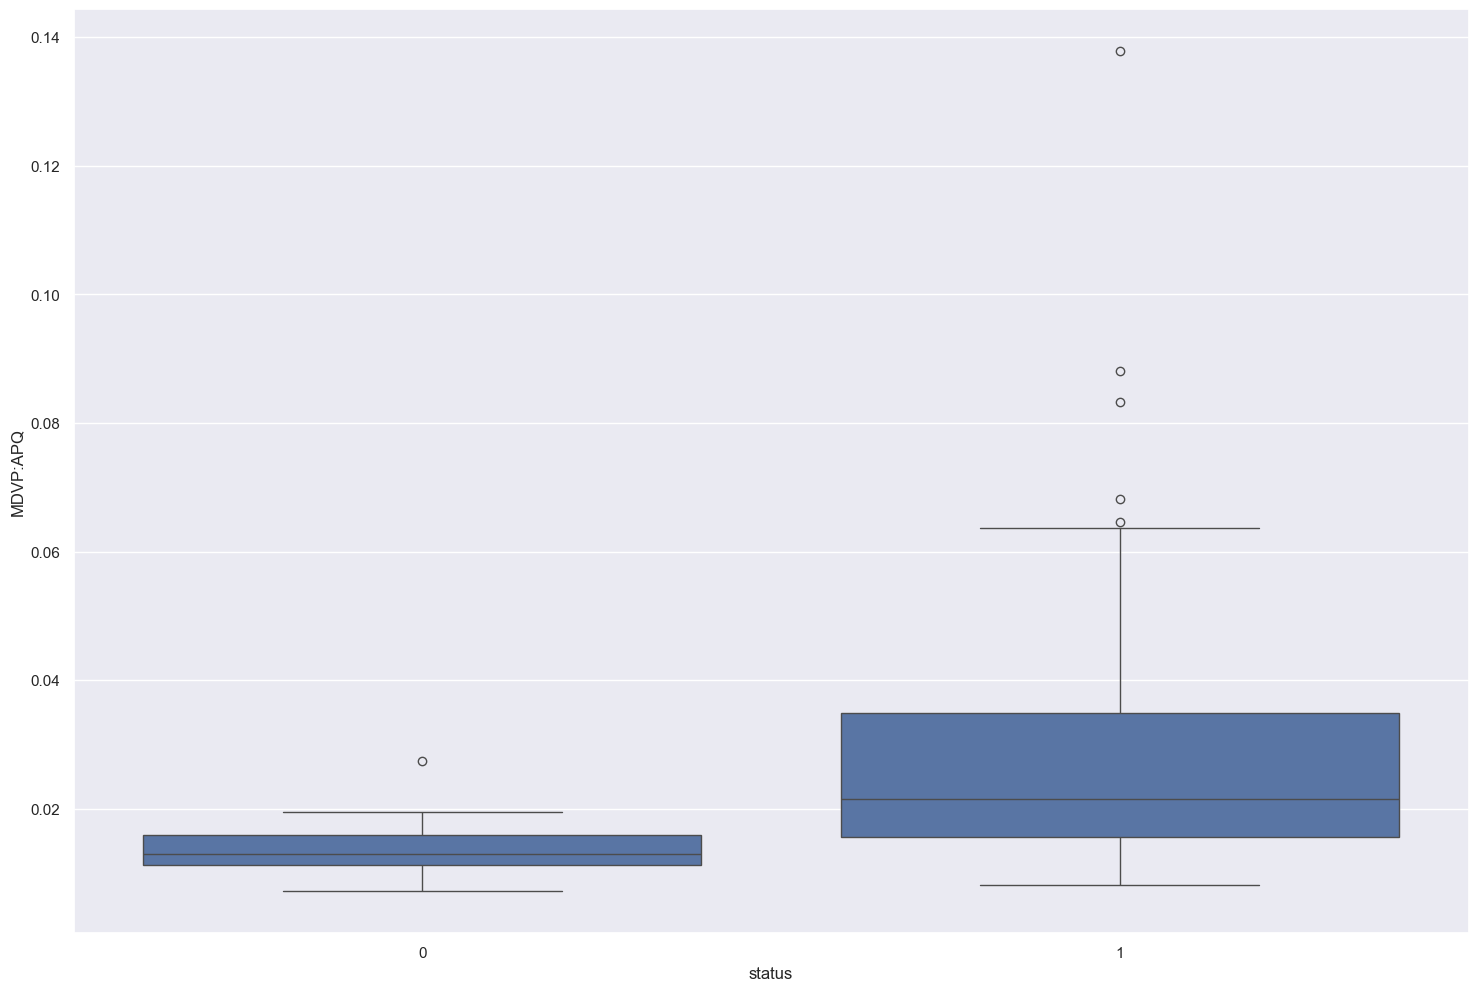

In [47]:
GetStats('MDVP:APQ')

## Conclusion:
For variable `MDVP:APQ`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 9.899441291095684
T-statitstics is:  TtestResult(statistic=5.150303446175209, pvalue=6.390538560329823e-07, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=8.00590873040187, pvalue=1.0871111093464914e-13, df=192.97707810523445)


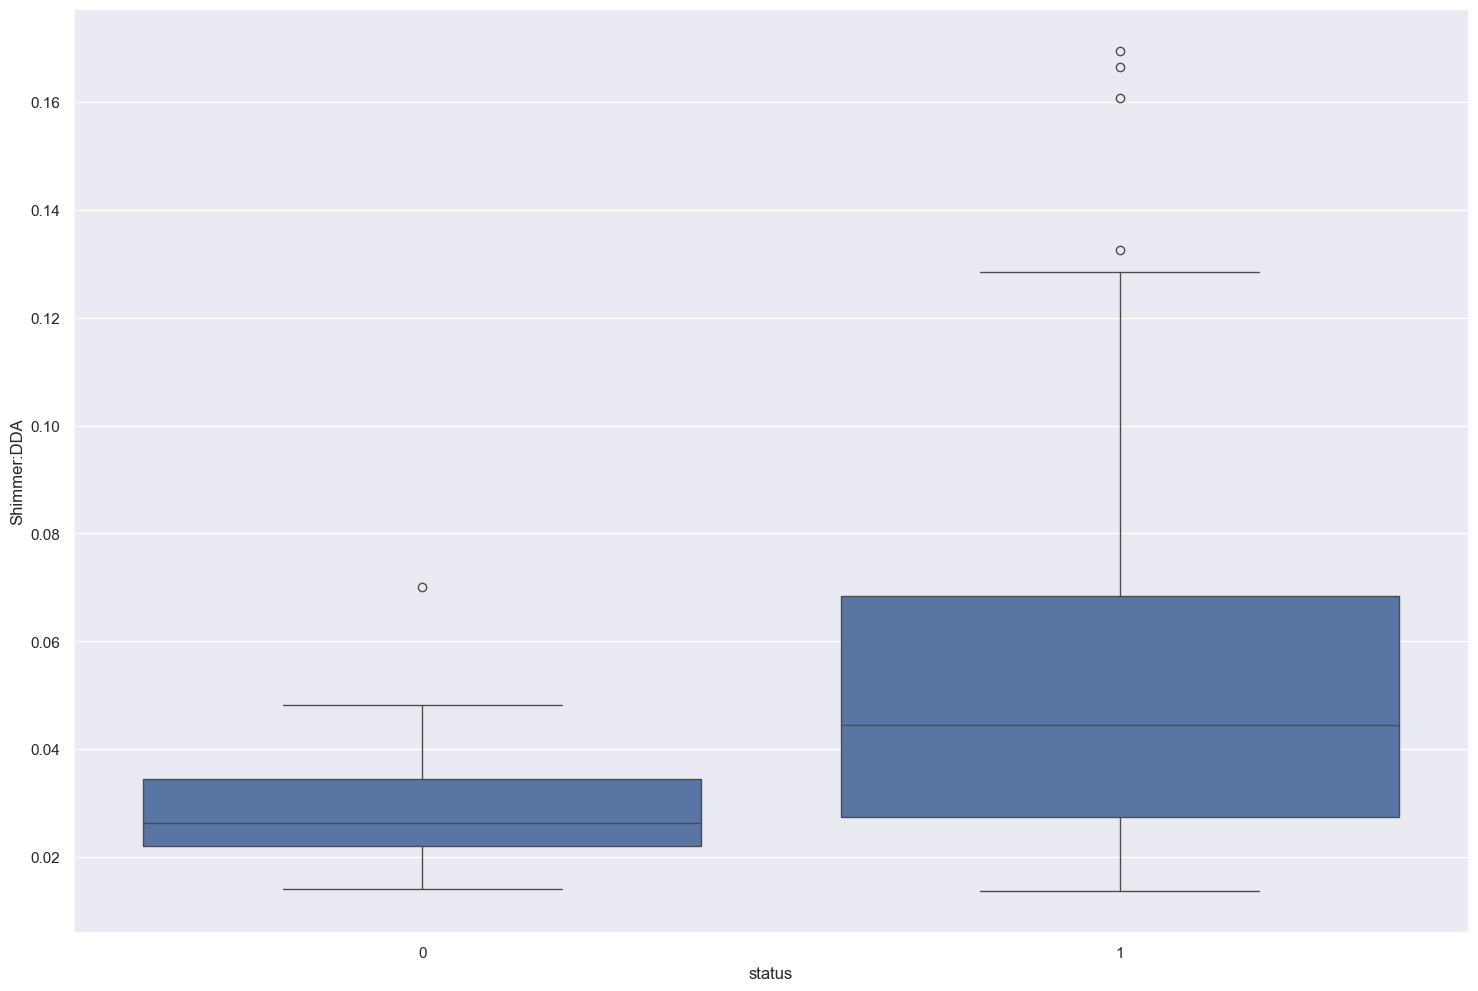

In [48]:
GetStats('Shimmer:DDA')

## Conclusion:
For variable `Shimmer:DDA`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 5.499559507075008
T-statitstics is:  TtestResult(statistic=2.680162257006514, pvalue=0.007994850518899753, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=3.8658493586714293, pvalue=0.0001545708298804488, df=179.5580908845851)


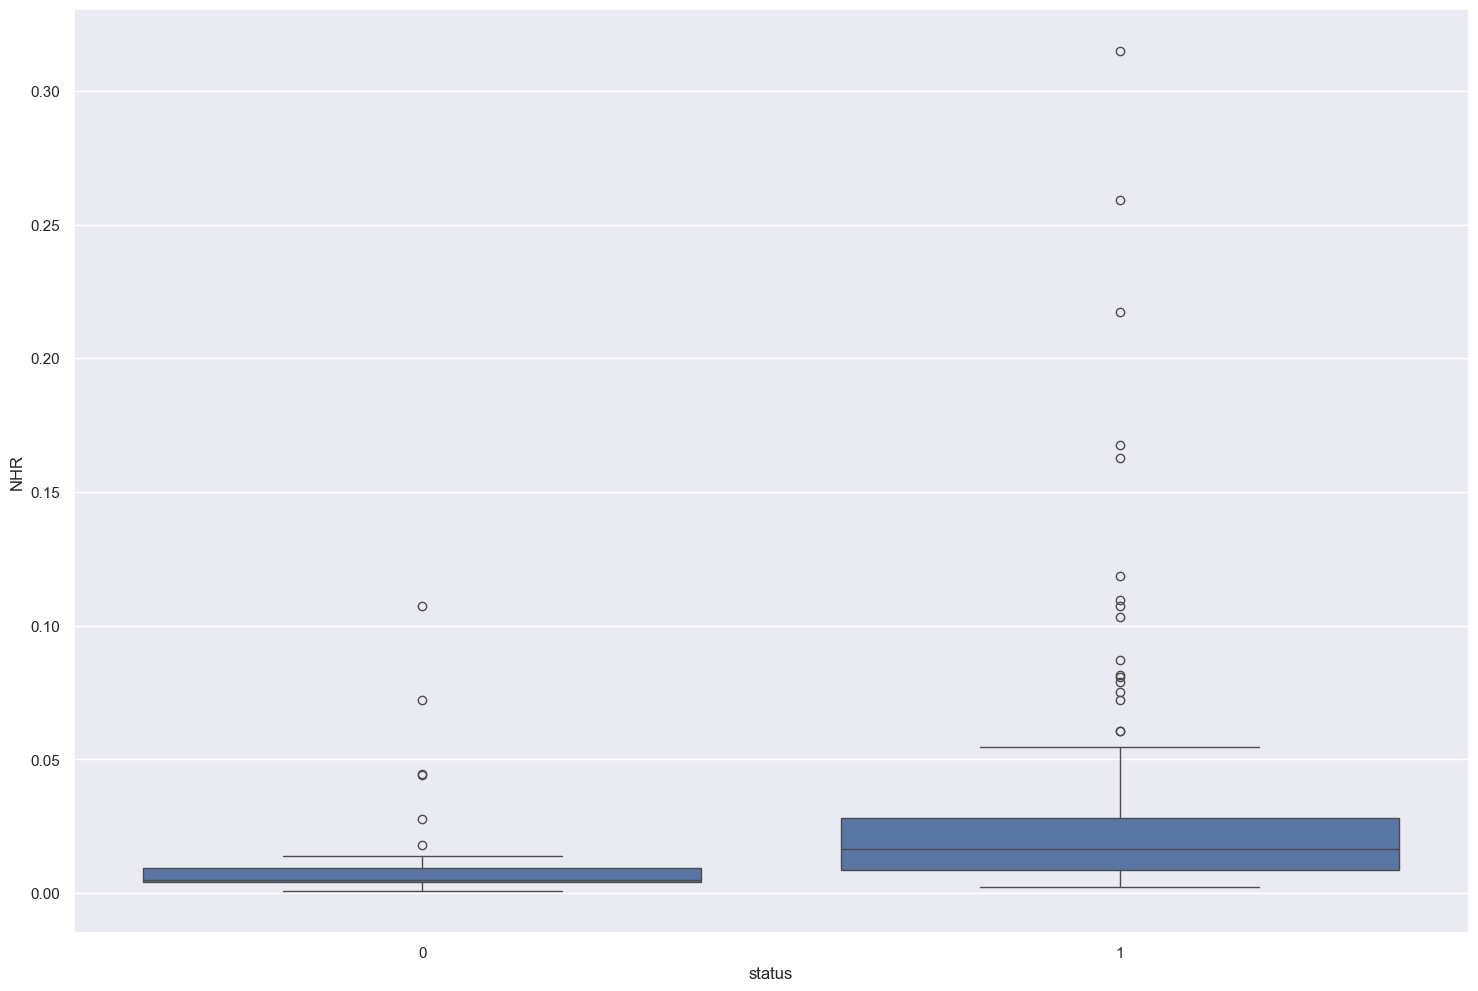

In [49]:
GetStats('NHR')

## Conclusion:
For variable `NHR`:
1. Variance between Parkinson and Non-parkinson patient is not same.
2. Based on Welch's T-Test, values are statistically significant for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 1.6190099174682258
T-statitstics is:  TtestResult(statistic=-5.3866434200444795, pvalue=2.0746773596796917e-07, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=-6.059180178677343, pvalue=2.4249101874660892e-08, df=100.01300737185763)


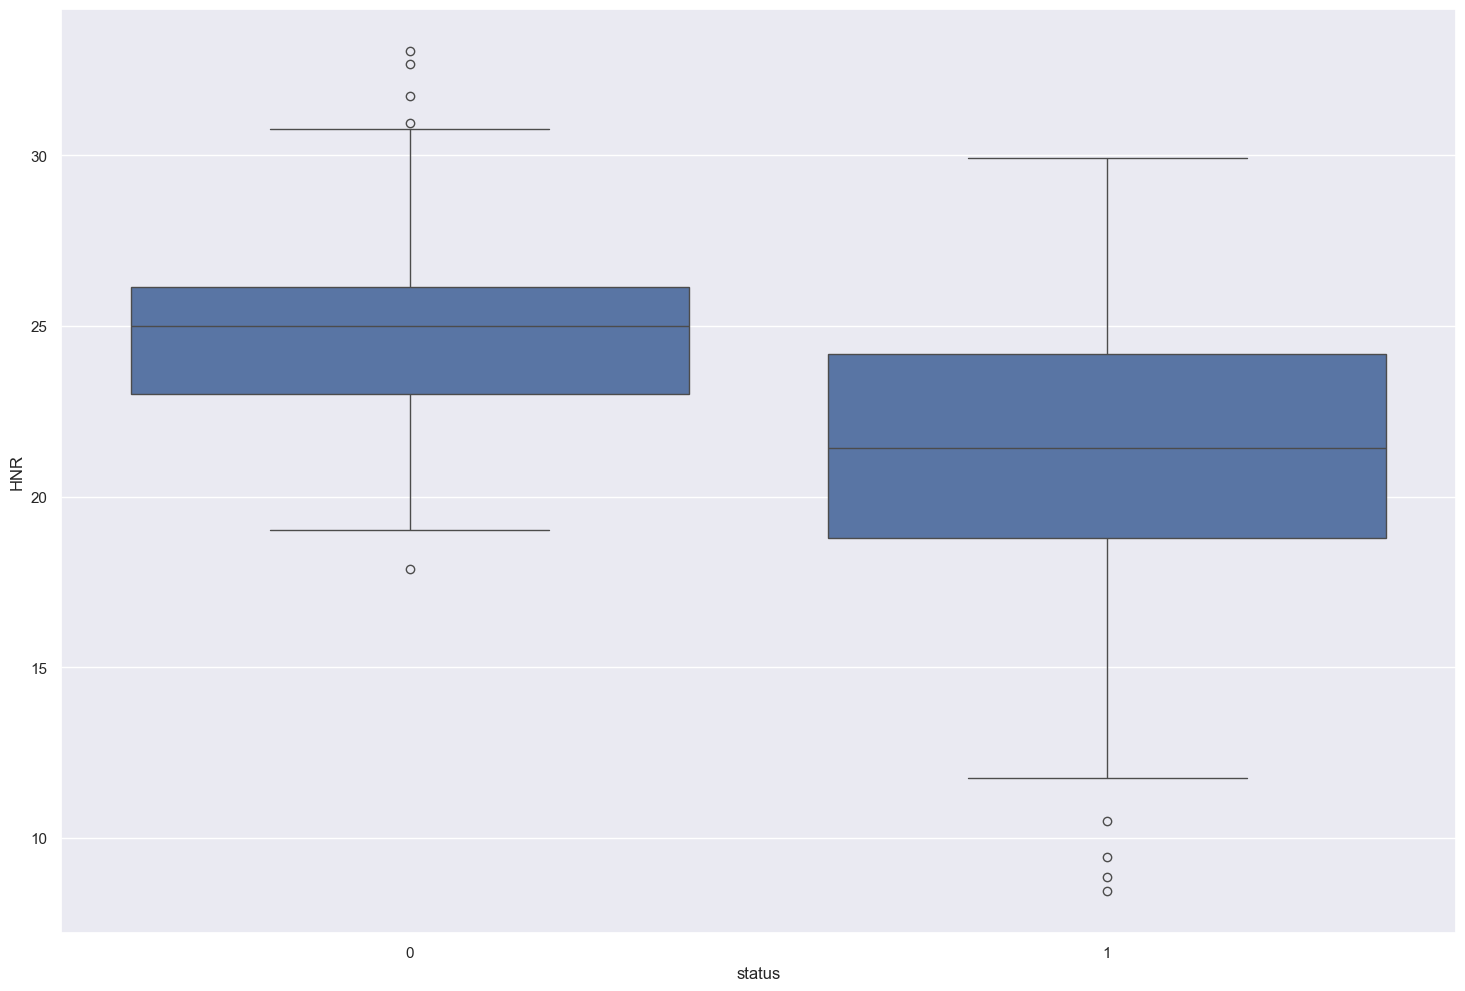

In [50]:
GetStats('HNR')

## Conclusion:
For variable `HNR`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 1.2233590051424286
T-statitstics is:  TtestResult(statistic=4.506667217991572, pvalue=1.1398962455333979e-05, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=4.7268228518816695, pvalue=8.716702912642152e-06, df=86.96658982883967)


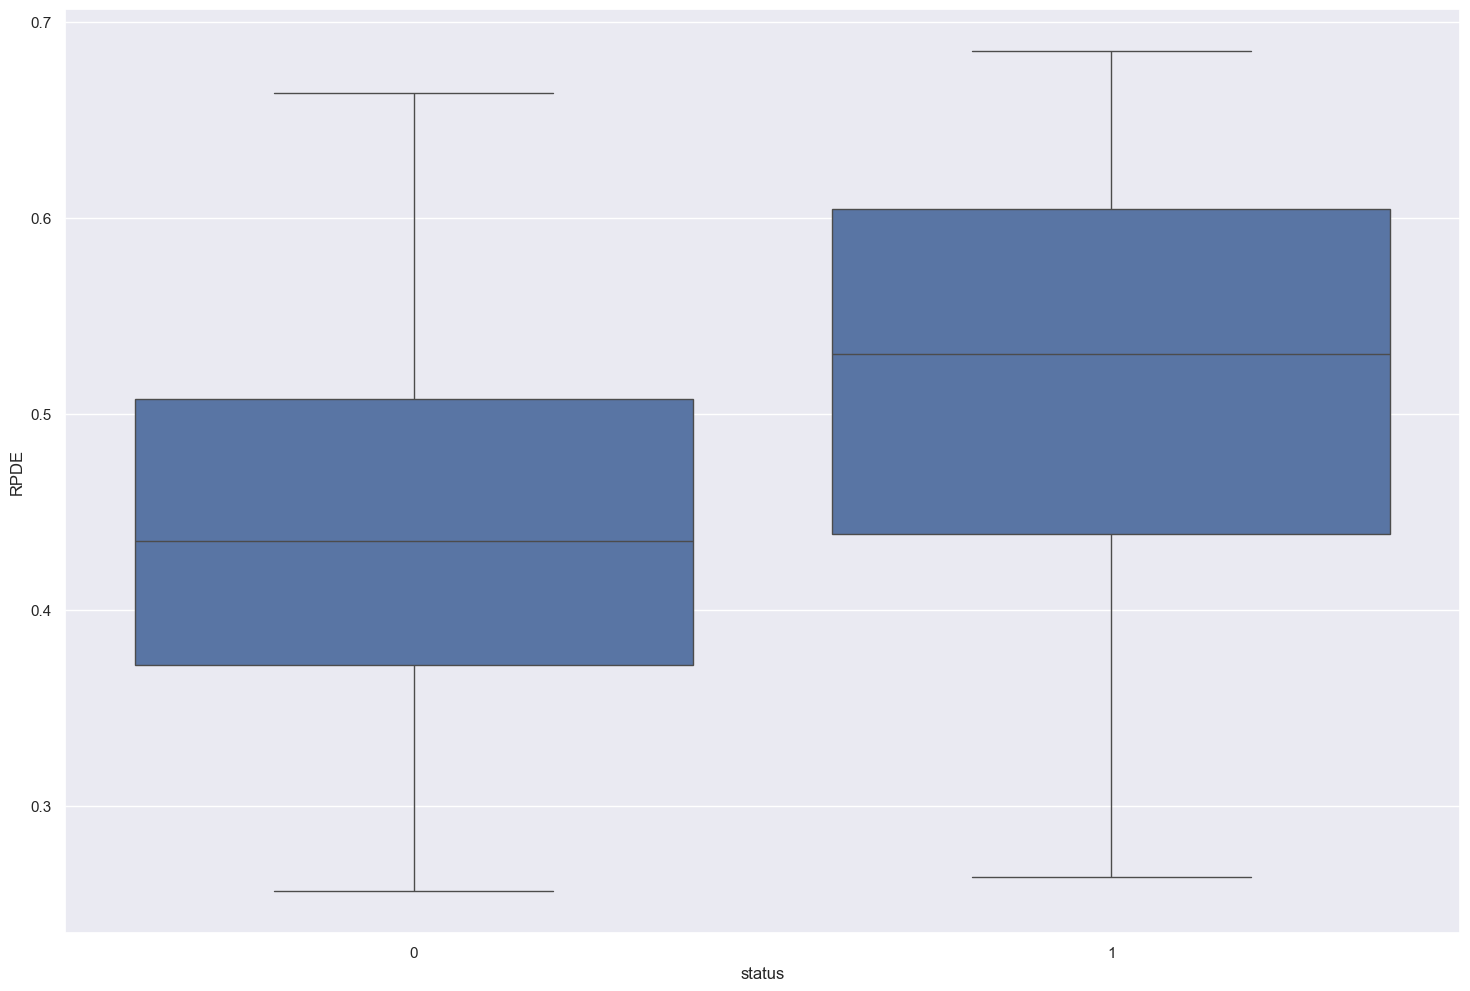

In [51]:
GetStats('RPDE')

## Conclusion:
For variable `RPDE`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 1.1548098030616052
T-statitstics is:  TtestResult(statistic=3.309516749366722, pvalue=0.0011151158798429466, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=3.420746476831021, pvalue=0.0009633778225339787, df=84.67324756138137)


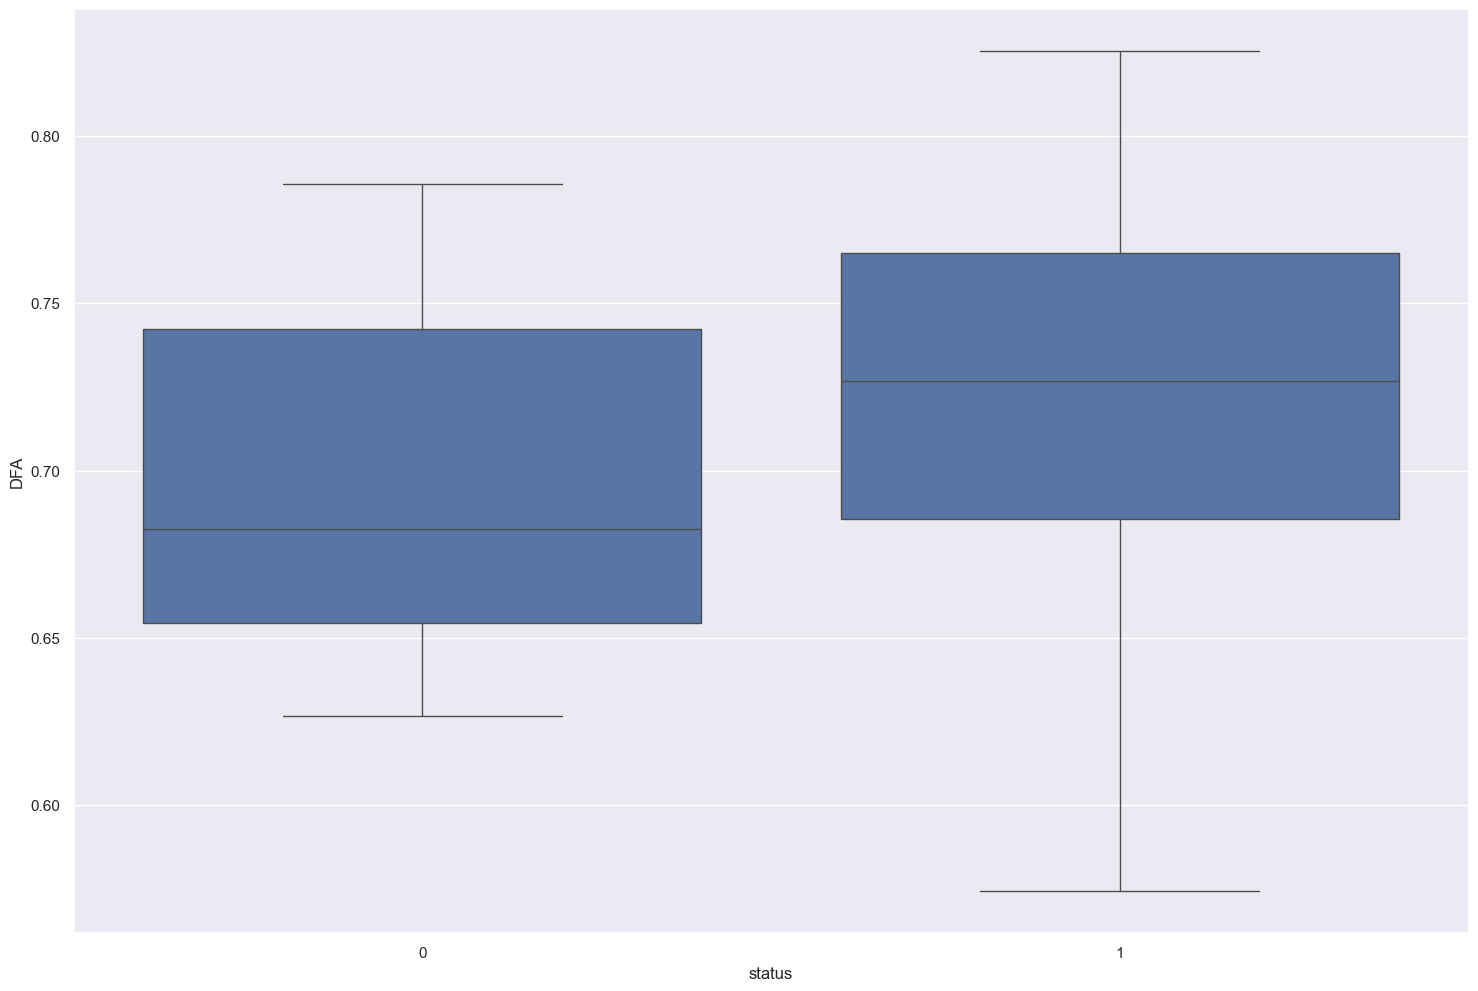

In [52]:
GetStats('DFA')

## Conclusion:
For variable `DFA`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 2.3136865330640237
T-statitstics is:  TtestResult(statistic=9.50916501145352, pvalue=7.909650873104307e-18, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=11.634674547436209, pvalue=1.7692236931173886e-21, df=121.40506533643932)


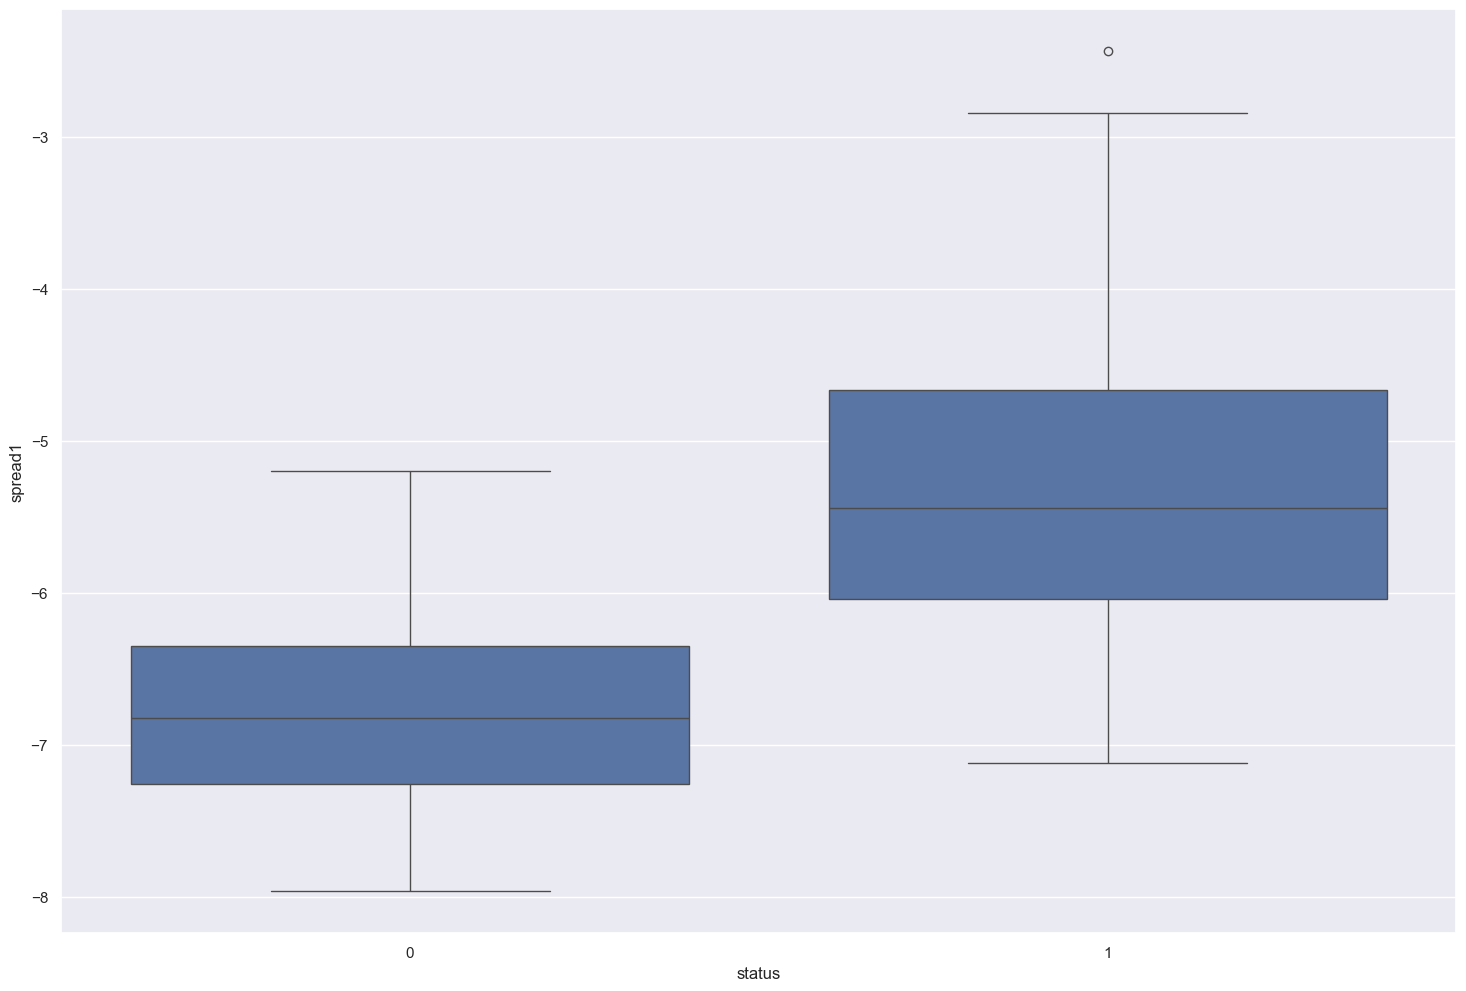

In [53]:
GetStats('spread1')

## Conclusion:
For variable `spread1`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 1.5481247103194358
T-statitstics is:  TtestResult(statistic=7.095291734966332, pvalue=2.391728762371237e-11, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=7.8938442975742635, pvalue=4.338048622008292e-12, df=97.70788515952819)


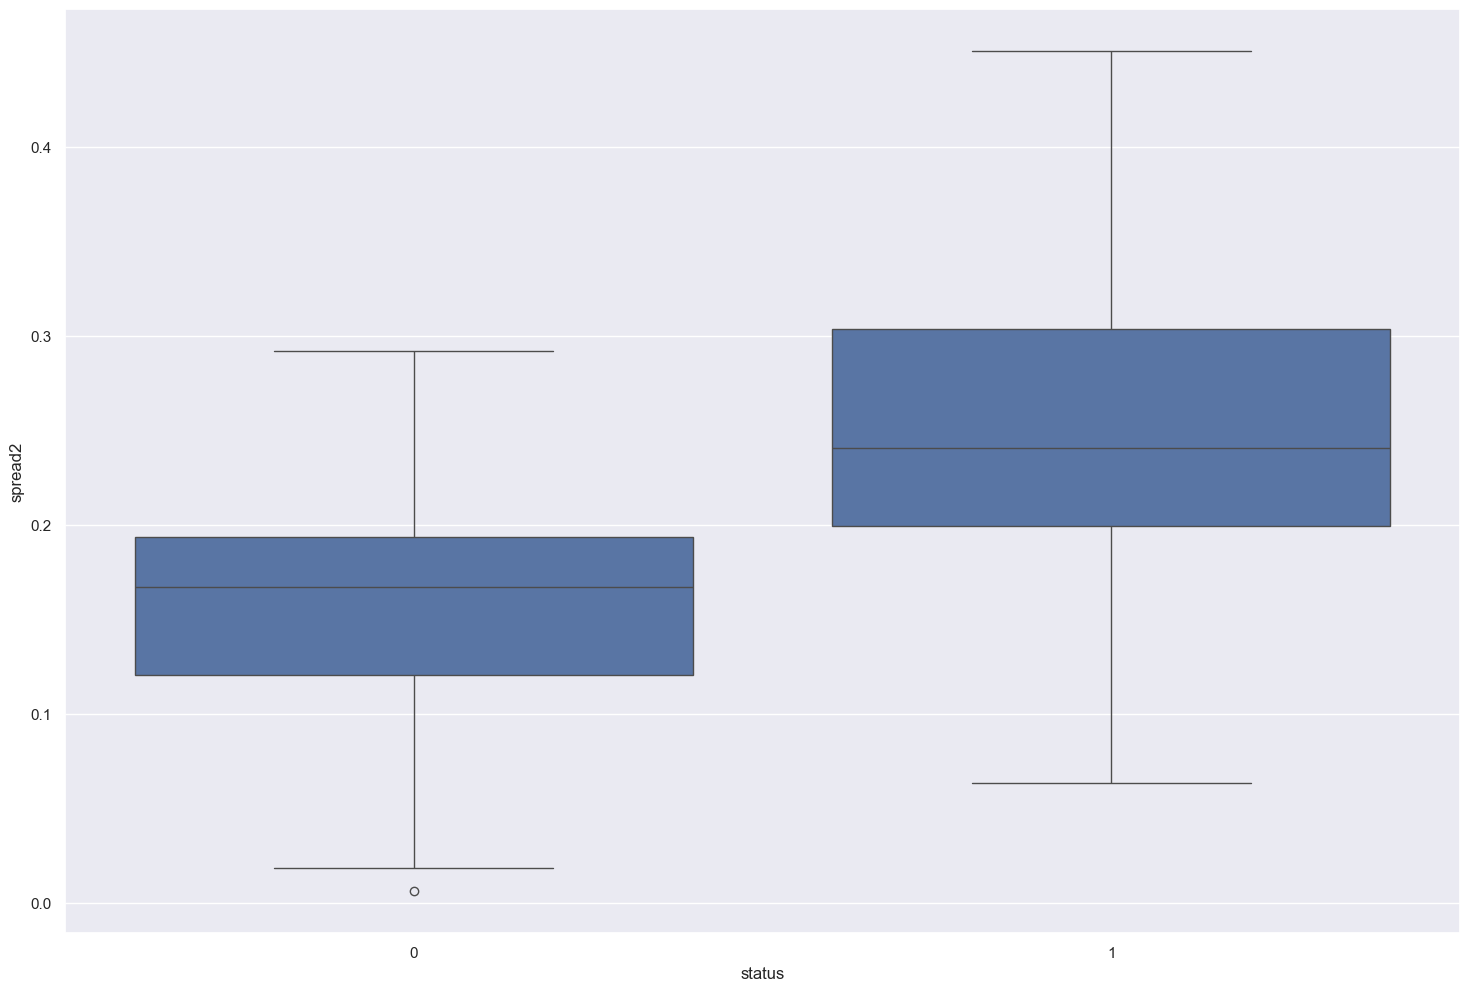

In [54]:
GetStats('spread2')

## Conclusion:
For variable `spread2`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 1.4875832303236005
T-statitstics is:  TtestResult(statistic=5.026520865711545, pvalue=1.1359246053142962e-06, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=5.537328906080143, pvalue=2.685349913232722e-07, df=95.72609659242666)


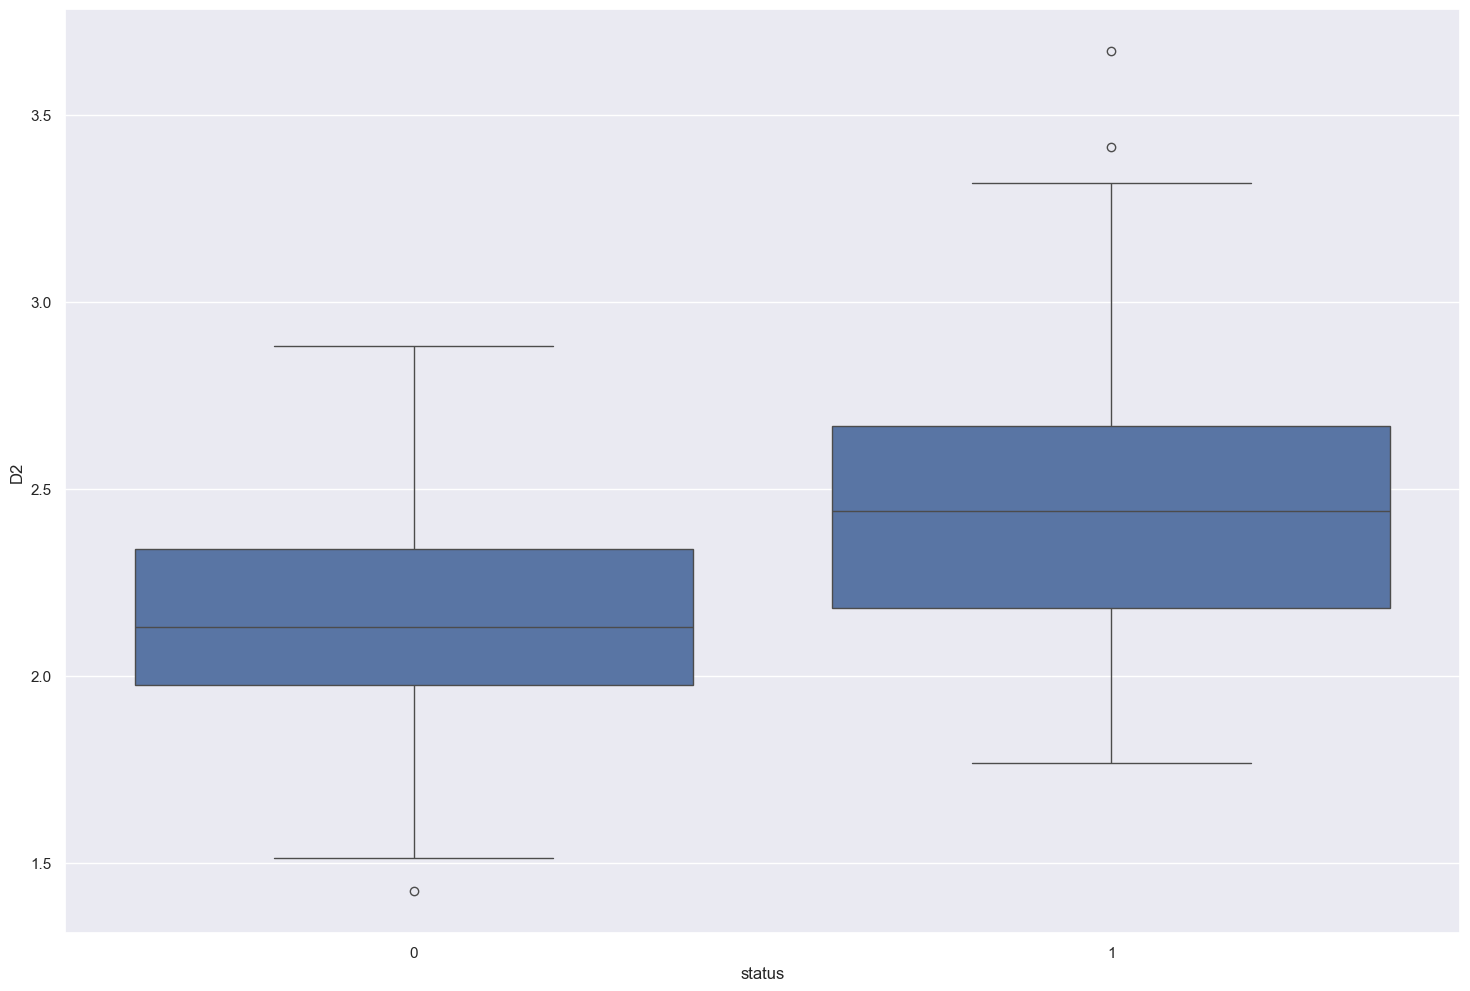

In [55]:
GetStats('D2')

## Conclusion:
For variable `D2`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

Variance ratio is = 3.5858921542110136
T-statitstics is:  TtestResult(statistic=8.70650305287767, pvalue=1.3926186153164435e-15, df=193.0)
Welch T-statitstics is:  TtestResult(statistic=11.670090179718107, pvalue=6.764318285836844e-23, df=152.65518686033568)


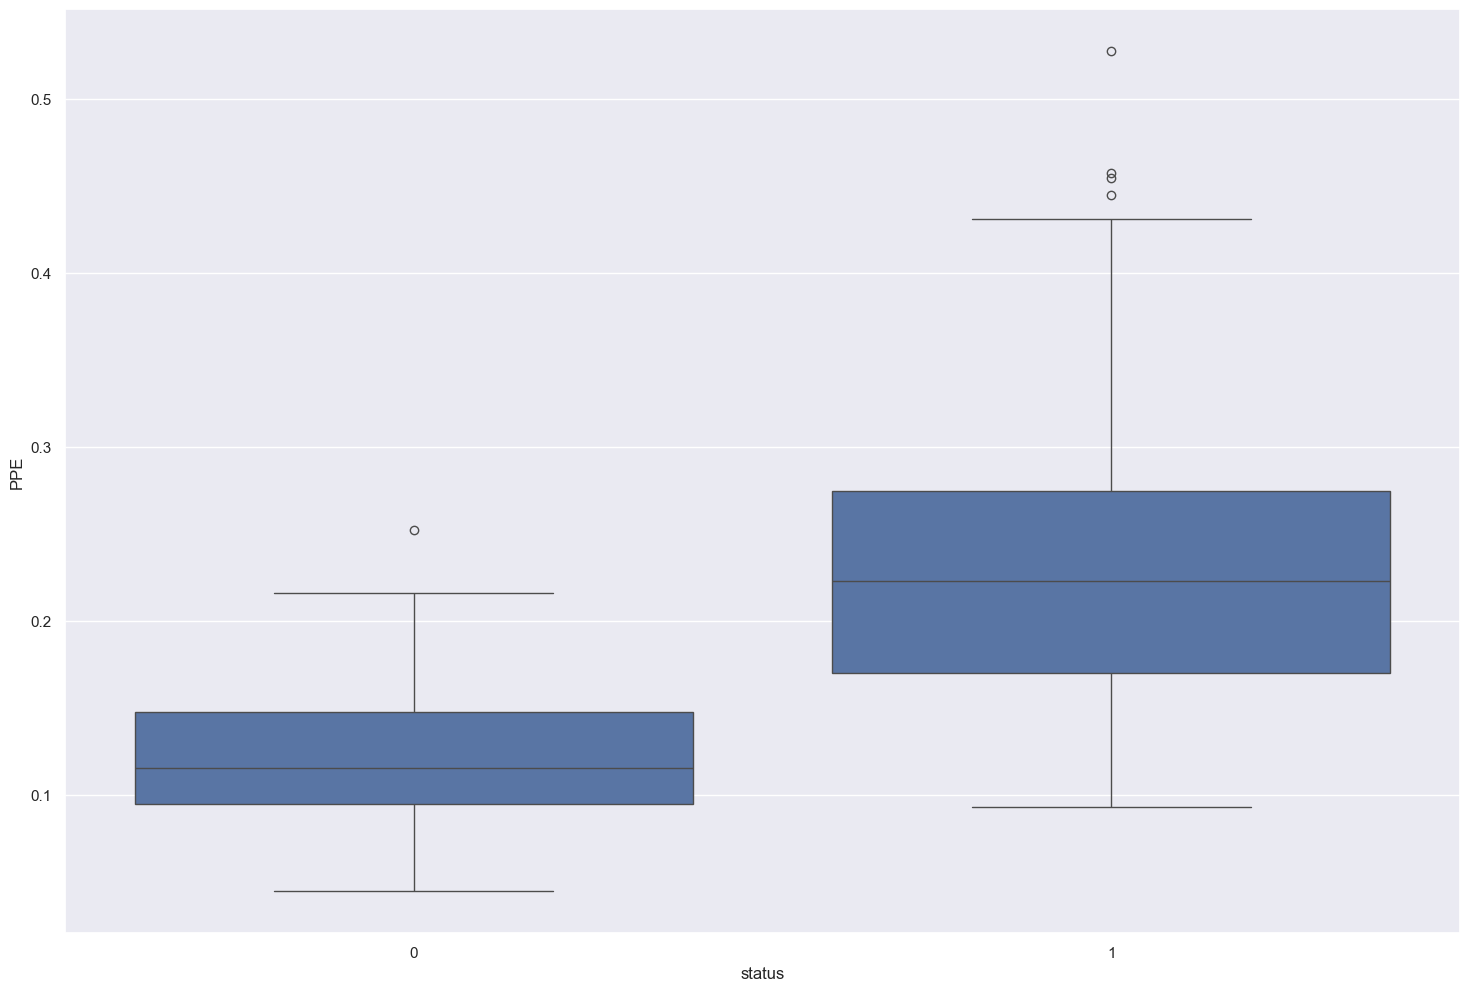

In [56]:
GetStats('PPE')

## Conclusion:
For variable `PPE`:
1. Variance between Parkinson and Non-parkinson patient is same.
2. Values are statistically different for Parkinson and Non-Parkinsons patient and we can use this variable for model building.

## Step 3: Building model by using Data as such without balancing
Since our data is binary, we have to use Classification models for our data

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [58]:
y1 = Data['status']
X1 = df_factors

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

In [60]:
ss_train = StandardScaler()
X_train1 = ss_train.fit_transform(X_train1)

ss_test = StandardScaler()
X_test1 = ss_test.fit_transform(X_test1)

In [61]:
# We will create function for confusion matrix
def plot_CF(y_test, y_pred):
    # Creating  a confusion matrix,which compares the y_test and y_pred
    cm = confusion_matrix(y_test, y_pred)
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(cm, index = ['Non Parkinson','Parkinson'], columns = ['Non Parkinson','Parkinson'])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #Plotting the confusion matrix
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_df, annot=labels,fmt='', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print("Classification Report:\n", classification_report(y_true=y_test, y_pred=y_pred))
    print("Model Accuracy is", accuracy_score(y_test, y_pred)*100)

In [62]:
# Testing function for Logistic Regression Model
lr1= LogisticRegression(C=5, class_weight='balanced', solver='liblinear', random_state=9)

In [63]:
lr1.fit(X_train1,y_train1)
y_pred1 = lr1.predict(X_test1)

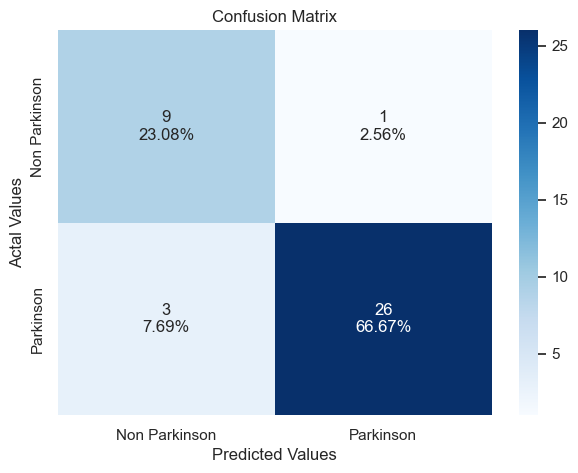

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

Model Accuracy is 89.74358974358975


In [64]:
plot_CF(y_test1, y_pred1)

In [65]:
# Now we will run multiple binary classification models and will compare their performance
models = {}
models['Logistic Regression'] = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=9)
models['Support Vector Machines'] = LinearSVC(class_weight='balanced', random_state=9)
models['Decision Trees'] = DecisionTreeClassifier(random_state=9)
models['Random Forest'] = RandomForestClassifier(random_state=9)
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()
models['Xg-Boost'] = XGBClassifier(random_state=9)
models['Ridge Classifier'] = RidgeClassifier(random_state=9)
models['Ada Boost Classifier'] = AdaBoostClassifier(random_state=9)

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
accuracy, AUC, recall, precision, F1 = {}, {}, {}, {}, {}
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train1, y_train1)
    
    # Make predictions
    predictions = models[key].predict(X_test1)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test1)
    AUC[key] = roc_auc_score(predictions, y_test1)
    recall[key] = recall_score(predictions, y_test1)
    precision[key] = precision_score(predictions, y_test1)
    F1[key] = f1_score(predictions, y_test1)

In [68]:
df_model1 = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score' ])
df_model1['Accuracy'] = accuracy.values()
df_model1['AUC'] = AUC.values()
df_model1['Recall'] = recall.values()
df_model1['Precision'] = precision.values()
df_model1['F1 Score'] = F1.values()

df_model1.sort_values(by=['Accuracy', 'F1 Score', 'AUC'], ascending=[False, False, False])

,Accuracy,AUC,Recall,Precision,F1 Score
Ridge Classifier,0.897436,0.939394,0.878788,1.000000,0.935484
Ada Boost Classifier,0.897436,0.939394,0.878788,1.000000,0.935484
Random Forest,0.871795,0.866071,0.875000,0.965517,0.918033
K-Nearest Neighbor,0.871795,0.866071,0.875000,0.965517,0.918033
Support Vector Machines,0.871795,0.826923,0.961538,0.862069,0.909091
Logistic Regression,0.846154,0.796296,0.925926,0.862069,0.892857
Xg-Boost,0.820513,0.811765,0.823529,0.965517,0.888889
Decision Trees,0.769231,0.691964,0.812500,0.896552,0.852459
Naive Bayes,0.692308,0.698684,0.947368,0.620690,0.750000


## Conclusion:
1. From this, we can conclude that the Ridge Classifier, Ada Boost Classifier, Random Forest, Support Vector Machines and K-Nearest Neighbor models are better models with accuracy more than 87.2%, f1 score more than 90.9%.
2. Ridge Classifier is the best model.
3. We need to check the confusion matrix for the top 5 models.

## Checking Ridge Classifier


In [69]:
rdc1 = RidgeClassifier(random_state=9)

In [70]:
rdc1.fit(X_train1,y_train1)
y_pred1 = rdc1.predict(X_test1)

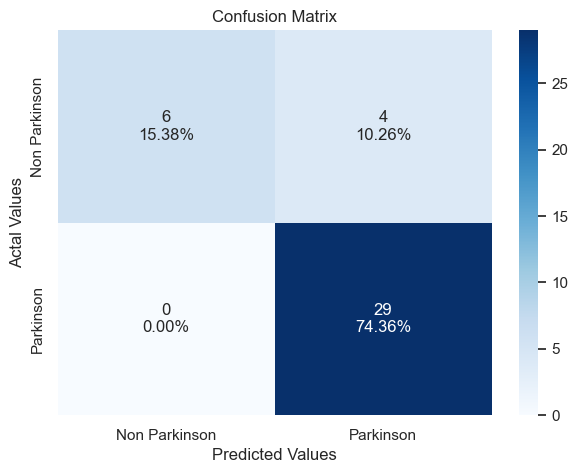

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted avg       0.91      0.90      0.89        39

Model Accuracy is 89.74358974358975


In [71]:
plot_CF(y_test1, y_pred1)

## Checking Ada Boost Classifier


In [72]:
adb1 = AdaBoostClassifier(random_state=9)

In [73]:
adb1.fit(X_train1,y_train1)
y_pred1 = adb1.predict(X_test1)

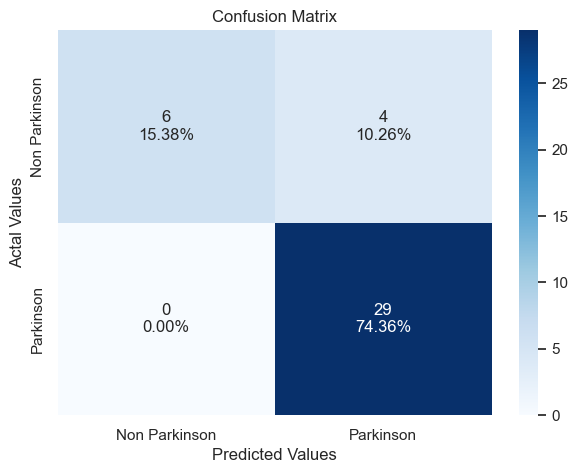

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted avg       0.91      0.90      0.89        39

Model Accuracy is 89.74358974358975


In [74]:
plot_CF(y_test1, y_pred1)

## Checking Random Forest Classifier


In [75]:
rfc1 = RandomForestClassifier(random_state=9)

In [76]:
rfc1.fit(X_train1,y_train1)
y_pred1 = rfc1.predict(X_test1)

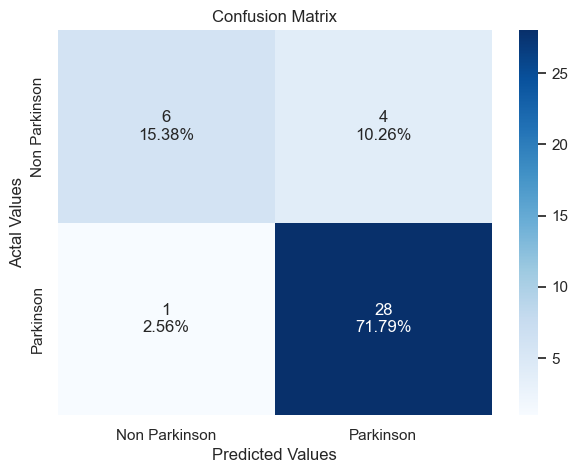

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39

Model Accuracy is 87.17948717948718


In [77]:
plot_CF(y_test1, y_pred1)

## Checking K-Nearest Neighbor Classifier


In [78]:
knn1 = KNeighborsClassifier()

In [79]:
knn1.fit(X_train1,y_train1)
y_pred1 = knn1.predict(X_test1)

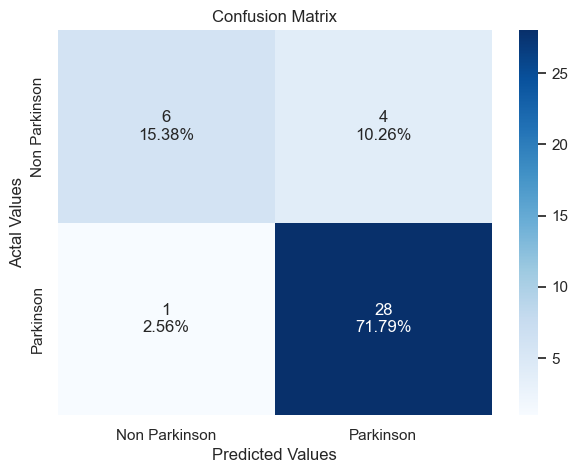

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39

Model Accuracy is 87.17948717948718


In [80]:
plot_CF(y_test1, y_pred1)

## Checking Support Vector Machines	Classifier


In [81]:
svm1 = LinearSVC(class_weight='balanced', random_state=9)

In [82]:
svm1.fit(X_train1,y_train1)
y_pred1 = svm1.predict(X_test1)

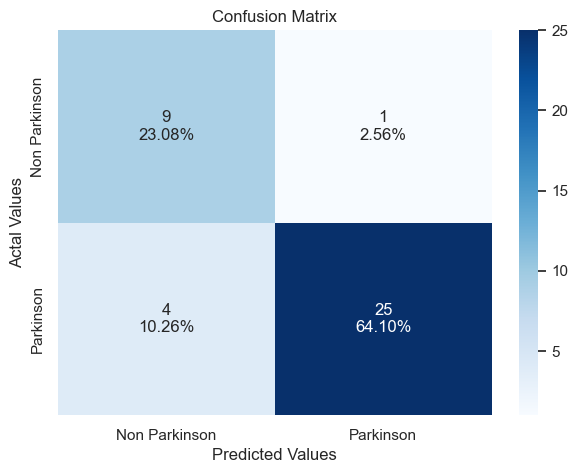

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

Model Accuracy is 87.17948717948718


In [83]:
plot_CF(y_test1, y_pred1)

## Conclusion:
Based on the confusion matrix, we can conclude that for the top 5 models:
1. The accuracy of prediction for Parkinsons patient is very high but for Non-Parkinsons person it is very poor.
2. This maybe due to class-imbalance problem in the given data (This can be seen from SVM data where the model is able to predict Non-Parkinsons person to a great exten).
3. Therefore, we need to balance the class and run the models again.

## Step 4: Building model with balanced data

In [84]:
#Since we have very small database, we will be doing oversampling rather than undersampling for balancing the data.
import imblearn
from imblearn.over_sampling import SMOTE

In [85]:
# transform the dataset
oversample = SMOTE(random_state=9)
X2, y2 = oversample.fit_resample(X1, y1)

In [86]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [87]:
ss_train = StandardScaler()
X_train2 = ss_train.fit_transform(X_train2)

ss_test = StandardScaler()
X_test2 = ss_test.fit_transform(X_test2)

In [88]:
y_test2.value_counts()

status
1    30
0    29
Name: count, dtype: int64

In [89]:
models = {}
models['Logistic Regression'] = LogisticRegression(solver='liblinear', random_state=9)
models['Support Vector Machines'] = LinearSVC(random_state=9)
models['Decision Trees'] = DecisionTreeClassifier(random_state=9)
models['Random Forest'] = RandomForestClassifier(random_state=9)
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()
models['Xg-Boost'] = XGBClassifier(random_state=9)
models['Ridge Classifier'] = RidgeClassifier(random_state=9)
models['Ada Boost Classifier'] = AdaBoostClassifier(random_state=9)

In [90]:
accuracy, AUC, recall, precision, F1 = {}, {}, {}, {}, {}
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train2, y_train2)
    
    # Make predictions
    predictions = models[key].predict(X_test2)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test2)
    AUC[key] = roc_auc_score(predictions, y_test2)
    recall[key] = recall_score(predictions, y_test2)
    precision[key] = precision_score(predictions, y_test2)
    F1[key] = f1_score(predictions, y_test2)

In [91]:
df_model2 = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score' ])
df_model2['Accuracy'] = accuracy.values()
df_model2['AUC'] = AUC.values()
df_model2['Recall'] = recall.values()
df_model2['Precision'] = precision.values()
df_model2['F1 Score'] = F1.values()

df_model2.sort_values(by=['Accuracy', 'F1 Score', 'AUC'], ascending=[False, False, False])

,Accuracy,AUC,Recall,Precision,F1 Score
Random Forest,0.983051,0.983333,1.000000,0.966667,0.983051
Xg-Boost,0.966102,0.968750,0.937500,1.000000,0.967742
K-Nearest Neighbor,0.966102,0.966092,0.966667,0.966667,0.966667
Ada Boost Classifier,0.949153,0.949425,0.965517,0.933333,0.949153
Decision Trees,0.881356,0.881912,0.870968,0.900000,0.885246
Ridge Classifier,0.847458,0.847701,0.862069,0.833333,0.847458
Logistic Regression,0.847458,0.850694,0.888889,0.800000,0.842105
Support Vector Machines,0.847458,0.850694,0.888889,0.800000,0.842105
Naive Bayes,0.745763,0.803922,0.941176,0.533333,0.680851


## Conclusion:
After balancing of data:
1. The top 4 models are Random Forest, Xg-Boost, K-Nearest Neighbor and Ada Boost Classifier with accuracy more than 94.9%, f1 score more than 94.9%.
2. Thus, After balancing of data the f1 score has improved significantly.
3. We need to check the confusion matrix for the top 4 models.

## Checking Random Forest Classifier after data balancing

In [92]:
rf2 = RandomForestClassifier(random_state=9)

In [93]:
rf2.fit(X_train2,y_train2)
y_pred2 = rf2.predict(X_test2)

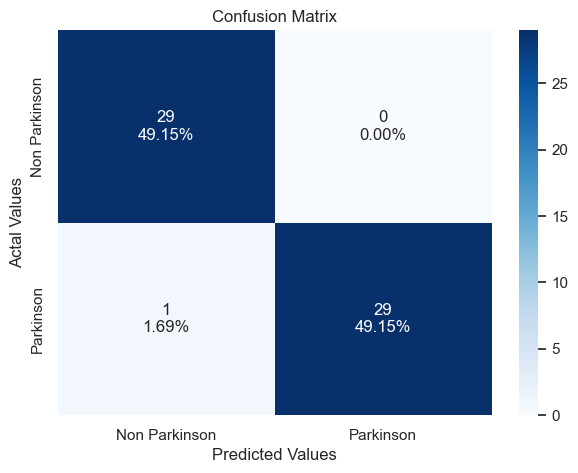

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        30

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

Model Accuracy is 98.30508474576271


In [94]:
plot_CF(y_test2, y_pred2)

## Checking Xg-Boost Classifier after data balancing

In [95]:
xgb2 = XGBClassifier(random_state=9)

In [96]:
xgb2.fit(X_train2,y_train2)
y_pred2 = xgb2.predict(X_test2)

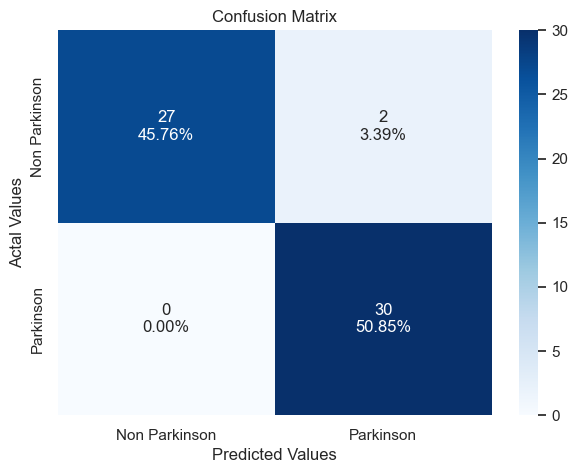

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.94      1.00      0.97        30

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Model Accuracy is 96.61016949152543


In [97]:
plot_CF(y_test2, y_pred2)

## Checking KNN Classifier after data balancing

In [98]:
knn2 = KNeighborsClassifier()

In [99]:
knn2.fit(X_train2,y_train2)
y_pred2 = knn2.predict(X_test2)

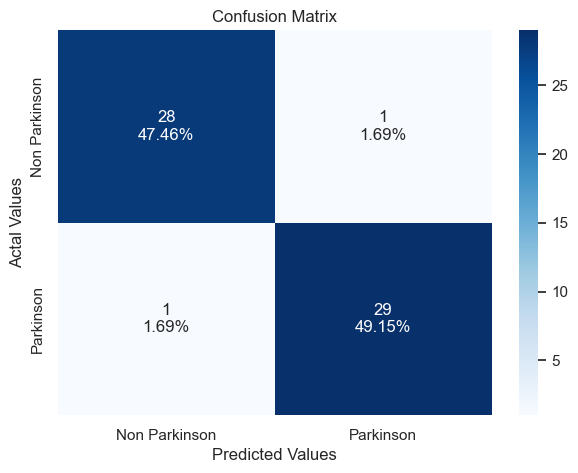

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        30

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Model Accuracy is 96.61016949152543


In [100]:
plot_CF(y_test2, y_pred2)

## Checking Ada Boost Classifier after data balancing

In [101]:
adb2 = AdaBoostClassifier(random_state=9)

In [102]:
adb2.fit(X_train2,y_train2)
y_pred2 = adb2.predict(X_test2)

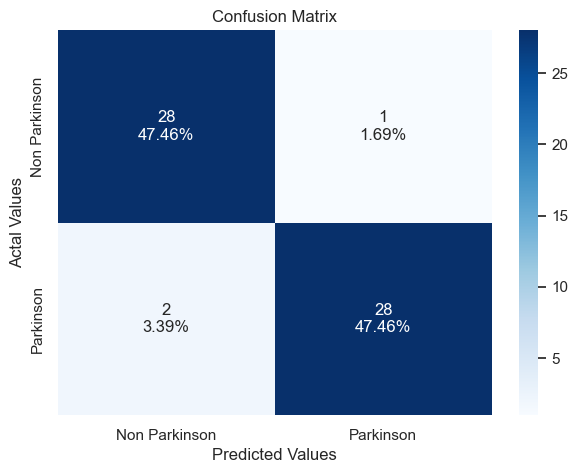

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      0.93      0.95        30

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Model Accuracy is 94.91525423728814


In [103]:
plot_CF(y_test2, y_pred2)

## Conclusion:
1. After class balancing of data, the top models are able to predict both Parkinsons and Non-Parkinsons person with high accuracy.
2. But we have seen that there are 22 input parameters for all the models and many of them were co-related.
3. We need to now explore building models with only important input variables (less number of input parameters).

## Step 5: Explore classification of balanced data with important input variables and only for top 2 models

In [104]:
features = df_factors.columns
features

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [105]:
def feature_Engg(Model):
    df = pd.DataFrame(list(zip(features,Model.feature_importances_)), columns=['Feature', 'Importance'])
    sorted_df = df.sort_values(by=['Importance'], ascending=False)
    sorted_df['Cumulative'] = sorted_df['Importance'].cumsum()
    sorted_df = sorted_df.sort_values(by=['Cumulative'], ascending=False)
    fig, ax1 = plt.subplots()
    col = []
    for val in sorted_df['Cumulative']:
        if val <= 0.8:
            col.append('green')
        elif val > 0.8:
            col.append('red')
    ax1.barh(sorted_df['Feature'], sorted_df['Importance'], color = col)
    ax1.set_xlabel('Importance')
    ax1.set_ylabel('Features')
    for i, v in enumerate(sorted_df['Importance']):
        ax1.text(v, i, str(v), color='blue', fontweight='bold')
    plt.show()
    rslt_df = sorted_df.loc[sorted_df['Cumulative'] < 0.8]
    rslt_df = rslt_df.sort_values(by=['Cumulative'], ascending=True)
    lst = list(rslt_df.Feature)
    print("List of Important features is: ", lst)

## Checking important input variables for Random Forest Classifier

In [106]:
# We will identify important features for Random Forest Classifier and rebuild the model
rfc3 = RandomForestClassifier(random_state=9)

In [107]:
# fit the model
rfc3.fit(X_train2, y_train2)

RandomForestClassifier(random_state=9)

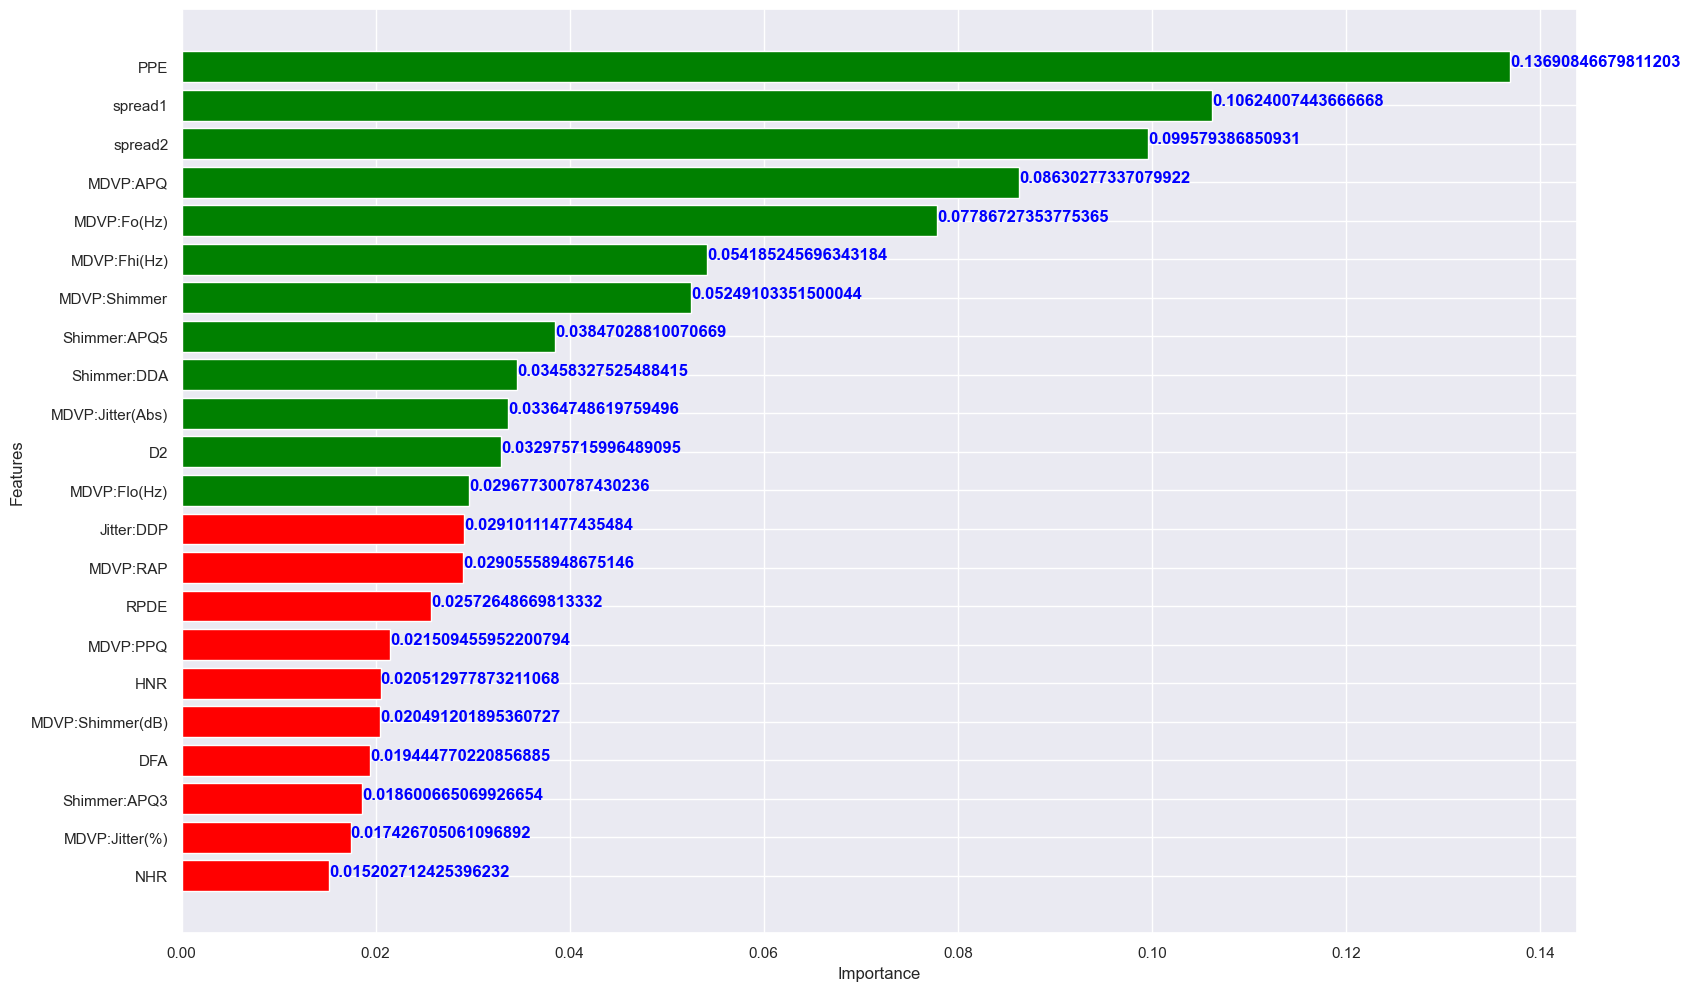

List of Important features is:  ['PPE', 'spread1', 'spread2', 'MDVP:APQ', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Shimmer', 'Shimmer:APQ5', 'Shimmer:DDA', 'MDVP:Jitter(Abs)', 'D2', 'MDVP:Flo(Hz)']


In [108]:
feature_Engg(rfc3)

In [109]:
df3 = Data[['PPE', 'spread1', 'spread2', 'MDVP:APQ', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Shimmer',
            'Shimmer:APQ5', 'Shimmer:DDA', 'MDVP:Jitter(Abs)', 'D2', 'MDVP:Flo(Hz)']]
df3.head()

,PPE,spread1,spread2,MDVP:APQ,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Shimmer,Shimmer:APQ5,Shimmer:DDA,MDVP:Jitter(Abs),D2,MDVP:Flo(Hz)
0,0.284654,-4.813031,0.266482,0.02971,119.992,157.302,0.04374,0.03130,0.06545,0.00007,2.301442,74.997
1,0.368674,-4.075192,0.335590,0.04368,122.400,148.650,0.06134,0.04518,0.09403,0.00008,2.486855,113.819
2,0.332634,-4.443179,0.311173,0.03590,116.682,131.111,0.05233,0.03858,0.08270,0.00009,2.342259,111.555
3,0.368975,-4.117501,0.334147,0.03772,116.676,137.871,0.05492,0.04005,0.08771,0.00009,2.405554,111.366
4,0.410335,-3.747787,0.234513,0.04465,116.014,141.781,0.06425,0.04825,0.10470,0.00011,2.332180,110.655


In [110]:
y3 = Data['status']
X3 = df3

In [111]:
# transform the dataset
oversample = SMOTE(random_state=9)
X3, y3 = oversample.fit_resample(X3, y3)

In [112]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

In [113]:
ss_train = StandardScaler()
X_train3 = ss_train.fit_transform(X_train3)

ss_test = StandardScaler()
X_test3 = ss_test.fit_transform(X_test3)

In [114]:
rfc4 = RandomForestClassifier(random_state=9)

In [115]:
rfc4.fit(X_train3,y_train3)
y_pred3 = rfc4.predict(X_test3)

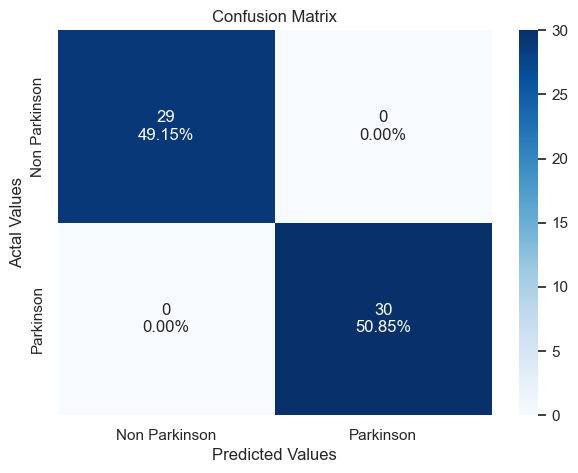

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Model Accuracy is 100.0


In [116]:
plot_CF(y_test3, y_pred3)

## Conclusion:
With Random Forest Classifier and Balanced data, when we choose top 12 input variables:
1. There is no impact on model accuracy.
2. Thus we can use only 12 input variables instead of 22 original input variables.
3. The 12 input variables are:
PPE, spread1, spread2, MDVP:APQ, MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Shimmer, Shimmer:APQ5, Shimmer:DDA, MDVP:Jitter(Abs), D2, MDVP:Flo(Hz)

## Checking important input variables for Xg-Boost Classifier



In [117]:
xgb3 = XGBClassifier(random_state=9)

In [118]:
# fit the model
xgb3.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=9, ...)

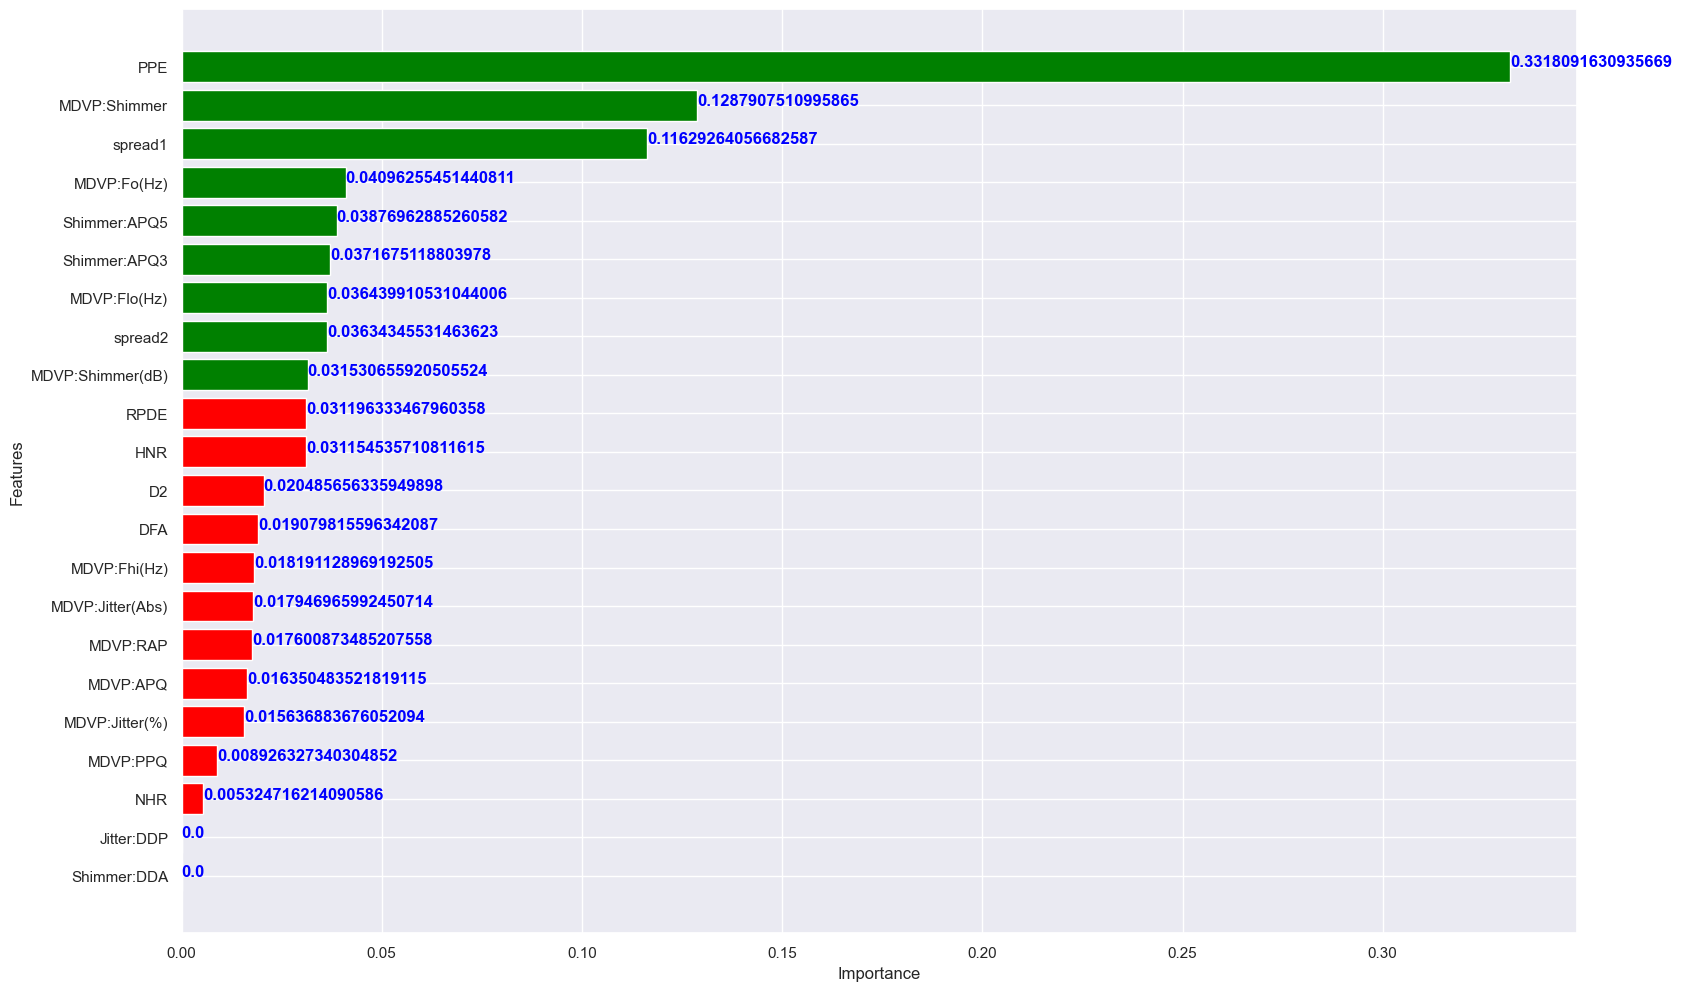

List of Important features is:  ['PPE', 'MDVP:Shimmer', 'spread1', 'MDVP:Fo(Hz)', 'Shimmer:APQ5', 'Shimmer:APQ3', 'MDVP:Flo(Hz)', 'spread2', 'MDVP:Shimmer(dB)']


In [119]:
feature_Engg(xgb3)

In [120]:
df4 = Data[['PPE', 'MDVP:Shimmer', 'spread1', 'MDVP:Fo(Hz)', 'Shimmer:APQ5', 'Shimmer:APQ3',
            'MDVP:Flo(Hz)', 'spread2', 'MDVP:Shimmer(dB)']]
df4.head()

,PPE,MDVP:Shimmer,spread1,MDVP:Fo(Hz),Shimmer:APQ5,Shimmer:APQ3,MDVP:Flo(Hz),spread2,MDVP:Shimmer(dB)
0,0.284654,0.04374,-4.813031,119.992,0.03130,0.02182,74.997,0.266482,0.426
1,0.368674,0.06134,-4.075192,122.400,0.04518,0.03134,113.819,0.335590,0.626
2,0.332634,0.05233,-4.443179,116.682,0.03858,0.02757,111.555,0.311173,0.482
3,0.368975,0.05492,-4.117501,116.676,0.04005,0.02924,111.366,0.334147,0.517
4,0.410335,0.06425,-3.747787,116.014,0.04825,0.03490,110.655,0.234513,0.584


In [121]:
y4 = Data['status']
X4 = df4

In [122]:
# transform the dataset
oversample = SMOTE(random_state=9)
X4, y4 = oversample.fit_resample(X4, y4)

In [123]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=1)

In [124]:
ss_train = StandardScaler()
X_train4 = ss_train.fit_transform(X_train4)

ss_test = StandardScaler()
X_test4 = ss_test.fit_transform(X_test4)

In [125]:
xgb4 = XGBClassifier(random_state=9)

In [126]:
xgb4.fit(X_train4,y_train4)
y_pred4 = xgb4.predict(X_test4)

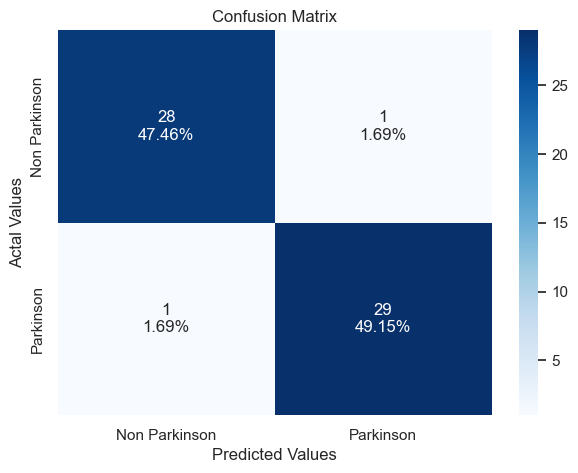

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        30

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

Model Accuracy is 96.61016949152543


In [127]:
plot_CF(y_test4, y_pred4)

## Conclusion:
With Xg-Boost Classifier and Balanced data, when we choose top 9 input variables:
1. There is no impact on model performance metrics (accuracy, f1 score).
2. We can use only 9 critical input variables instead of original 22 input variables.
3. The 9 critical input variables are:
   PPE, MDVP:Shimmer, spread1, MDVP:Fo(Hz), Shimmer:APQ5, Shimmer:APQ3, MDVP:Flo(Hz), spread2, MDVP:Shimmer(dB)

## Let us check all the models with 12 input variables based on Random Forest Classifier

In [128]:
models = {}
models['Logistic Regression'] = LogisticRegression(solver='liblinear', random_state=9)
models['Support Vector Machines'] = LinearSVC(random_state=9)
models['Decision Trees'] = DecisionTreeClassifier(random_state=9)
models['Random Forest'] = RandomForestClassifier(random_state=9)
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()
models['Xg-Boost'] = XGBClassifier(random_state=9)
models['Ridge Classifier'] = RidgeClassifier(random_state=9)
models['Ada Boost Classifier'] = AdaBoostClassifier(random_state=9)

In [129]:
accuracy, AUC, recall, precision, F1 = {}, {}, {}, {}, {}
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train3, y_train3)
    
    # Make predictions
    predictions = models[key].predict(X_test3)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test3)
    AUC[key] = roc_auc_score(predictions, y_test3)
    recall[key] = recall_score(predictions, y_test3)
    precision[key] = precision_score(predictions, y_test3)
    F1[key] = f1_score(predictions, y_test3)

In [130]:
df_model3 = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score' ])
df_model3['Accuracy'] = accuracy.values()
df_model3['AUC'] = AUC.values()
df_model3['Recall'] = recall.values()
df_model3['Precision'] = precision.values()
df_model3['F1 Score'] = F1.values()

df_model3.sort_values(by=['Accuracy', 'F1 Score', 'AUC'], ascending=[False, False, False])

,Accuracy,AUC,Recall,Precision,F1 Score
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbor,0.966102,0.967742,1.000000,0.933333,0.965517
Xg-Boost,0.932203,0.932184,0.933333,0.933333,0.933333
Ada Boost Classifier,0.915254,0.915517,0.931034,0.900000,0.915254
Decision Trees,0.898305,0.899770,0.928571,0.866667,0.896552
Naive Bayes,0.830508,0.871795,1.000000,0.666667,0.800000
Logistic Regression,0.779661,0.782407,0.814815,0.733333,0.771930
Support Vector Machines,0.762712,0.763825,0.785714,0.733333,0.758621
Ridge Classifier,0.694915,0.695853,0.714286,0.666667,0.689655


## Step 6: Let us build model by removing multicollinearity in input variables

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [132]:
# We will build a function to calculate variance inflation factor (vif) and 
# delete columns with highest vif sequentially till all vifs are less than 5.
def calculate_vif_(X, thresh=5.0):
    X = X.assign(const=1)  # faster than add_constant from statsmodels
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
                for ix in range(X.iloc[:, variables].shape[1])]
        vif = vif[:-1]  # don't let the constant be removed in the loop.
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables[:-1]])
    return X.iloc[:, variables[:-1]]

In [133]:
# get the final data file after removing multicollinearity
df_all_factors = df_factors
df_no_collinear = calculate_vif_(df_all_factors)
df_no_collinear.head()

dropping 'Shimmer:APQ3' at index: 10
dropping 'Jitter:DDP' at index: 7
dropping 'MDVP:Shimmer' at index: 7
dropping 'MDVP:Jitter(%)' at index: 3
dropping 'MDVP:RAP' at index: 4
dropping 'MDVP:Shimmer(dB)' at index: 5
dropping 'Shimmer:APQ5' at index: 5
dropping 'MDVP:PPQ' at index: 4
dropping 'PPE' at index: 13
dropping 'MDVP:Jitter(Abs)' at index: 3
dropping 'Shimmer:DDA' at index: 4
dropping 'HNR' at index: 5
Remaining variables:
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:APQ', 'NHR',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:APQ,NHR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.02971,0.02211,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.04368,0.01929,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.03590,0.01309,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.03772,0.01353,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.04465,0.01767,0.417356,0.823484,-3.747787,0.234513,2.332180


In [134]:
df_no_collinear.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:APQ,NHR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.02971,0.02211,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.04368,0.01929,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.03590,0.01309,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.03772,0.01353,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.04465,0.01767,0.417356,0.823484,-3.747787,0.234513,2.332180


In [135]:
y5 = Data['status']
X5 = df_no_collinear

In [136]:
# transform the dataset
oversample = SMOTE(random_state=9)
X5, y5 = oversample.fit_resample(X5, y5)

In [137]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=1)

In [138]:
ss_train = StandardScaler()
X_train5 = ss_train.fit_transform(X_train5)

ss_test = StandardScaler()
X_test5 = ss_test.fit_transform(X_test5)

In [139]:
models = {}
models['Logistic Regression'] = LogisticRegression(solver='liblinear', random_state=9)
models['Support Vector Machines'] = LinearSVC(random_state=9)
models['Decision Trees'] = DecisionTreeClassifier(random_state=9)
models['Random Forest'] = RandomForestClassifier(random_state=9)
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbor'] = KNeighborsClassifier()
models['Xg-Boost'] = XGBClassifier(random_state=9)
models['Ridge Classifier'] = RidgeClassifier(random_state=9)
models['Ada Boost Classifier'] = AdaBoostClassifier(random_state=9)

In [140]:
accuracy, AUC, recall, precision, F1 = {}, {}, {}, {}, {}
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train5, y_train5)
    
    # Make predictions
    predictions = models[key].predict(X_test5)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test5)
    AUC[key] = roc_auc_score(predictions, y_test5)
    recall[key] = recall_score(predictions, y_test5)
    precision[key] = precision_score(predictions, y_test5)
    F1[key] = f1_score(predictions, y_test5)

In [141]:
df_model4 = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score' ])
df_model4['Accuracy'] = accuracy.values()
df_model4['AUC'] = AUC.values()
df_model4['Recall'] = recall.values()
df_model4['Precision'] = precision.values()
df_model4['F1 Score'] = F1.values()

df_model4.sort_values(by=['Accuracy', 'F1 Score', 'AUC'], ascending=[False, False, False])

,Accuracy,AUC,Recall,Precision,F1 Score
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbor,0.983051,0.983333,1.000000,0.966667,0.983051
Xg-Boost,0.932203,0.934606,0.906250,0.966667,0.935484
Support Vector Machines,0.932203,0.939394,1.000000,0.866667,0.928571
Ada Boost Classifier,0.915254,0.915899,0.903226,0.933333,0.918033
Decision Trees,0.915254,0.918981,0.962963,0.866667,0.912281
Logistic Regression,0.881356,0.884838,0.925926,0.833333,0.877193
Naive Bayes,0.762712,0.767483,0.807692,0.700000,0.750000
Ridge Classifier,0.745763,0.748252,0.727273,0.800000,0.761905


## Conclusion:
After removing multicollinear varaibels:
1. There were 10 input variables left to build classification model
2. The performance metric for the top classifiers viz, Accuracy & F1 score has not affected much (actually it has improved)
3. We can use these input paramaters for prediction of Parkinson disease
4. Random forest classfier does not need data scaling and we can build model as such without scaling

## Let us build Random Forest classifier with the unscaled balanced data

In [142]:
y6 = Data['status']
X6 = df_no_collinear

In [143]:
# transform the dataset
oversample = SMOTE(random_state=9)
X6, y6 = oversample.fit_resample(X6, y6)

In [144]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=1)

In [145]:
rfc5 = RandomForestClassifier(random_state=9)

In [146]:
rfc5.fit(X_train6,y_train6)
y_pred6 = rfc5.predict(X_test6)

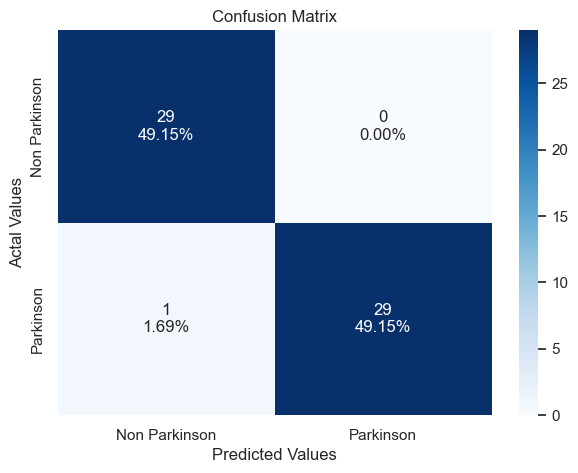

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        30

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

Model Accuracy is 98.30508474576271


In [147]:
plot_CF(y_test6, y_pred6)

In [148]:
#Let us save the models and use it in future for prediction of Parkinson Disease
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rfc5, open(filename, 'wb'))

In [149]:
import tkinter as tk
import pandas as pd
from tkinter import messagebox

In [150]:
# Let us load model and check the prediction
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(random_state=9)

In [ ]:
# Let us create a input form using tkinter
def cleaninfo():
    data = data.clear()

def saveinfo():
    valor1 = entry1.get()
    valor2 = entry2.get()
    valor3 = entry3.get()
    valor4 = entry4.get()
    valor5 = entry5.get()
    valor6 = entry6.get()
    valor7 = entry7.get()
    valor8 = entry8.get()
    valor9 = entry9.get()
    valor10 = entry10.get()
    valor11 = entry11.get()

    data.append([valor1, valor2, valor3,valor4,valor5,valor6,valor7,valor8,valor9,valor10,valor11])
    print(data) 
    
def checkResult():
    df = pd.DataFrame(data, columns = ['Customer ID','MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:APQ', 'NHR',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2'])
    Xnew = df.drop(['Customer ID'], axis=1)
    ynew = loaded_model.predict(Xnew)
    if ynew > 0.5:
        tk.messagebox.showinfo(title='Output', message='Patient is suffering from Parkinsons Disease, Please validate clinically')
    else:
        tk.messagebox.showinfo(title='Output', message='Patient is not suffering from Parkinsons Disease, Please validate clinically')



def opennewwindow():
    global entry1
    global entry2
    global entry3
    global entry4
    global entry5
    global entry6
    global entry7
    global entry8
    global entry9
    global entry10
    global entry11
    
    window.destroy()

    newwindow = tk.Tk()

    tk.Label(newwindow, text="Please, enter data: ").grid(column=0, row=0, columnspan=11)

    tk.Label(newwindow, text="Patient ID").grid(column=0, row=1)
    entry1 = tk.Entry(newwindow)
    entry1.grid(column=1, row=1)

    tk.Label(newwindow, text="MDVP:Fo(Hz) value", ).grid(column=0, row=2)
    entry2 = tk.Entry(newwindow)
    entry2.grid(column=1, row=2)

    tk.Label(newwindow, text="MDVP:Fhi(Hz) value").grid(column=0, row=3)
    entry3 = tk.Entry(newwindow)
    entry3.grid(column=1, row=3)
    
    tk.Label(newwindow, text="MDVP:Flo(Hz) value").grid(column=0, row=4)
    entry4 = tk.Entry(newwindow)
    entry4.grid(column=1, row=4)
    
    tk.Label(newwindow, text="MDVP:APQ value").grid(column=0, row=5)
    entry5 = tk.Entry(newwindow)
    entry5.grid(column=1, row=5)
    
    tk.Label(newwindow, text="NHR value").grid(column=0, row=6)
    entry6 = tk.Entry(newwindow)
    entry6.grid(column=1, row=6)
    
    tk.Label(newwindow, text="RPDE value").grid(column=0, row=7)
    entry7 = tk.Entry(newwindow)
    entry7.grid(column=1, row=7)
    
    tk.Label(newwindow, text="DFA value").grid(column=0, row=8)
    entry8 = tk.Entry(newwindow)
    entry8.grid(column=1, row=8)
    
    tk.Label(newwindow, text="spread1 value").grid(column=0, row=9)
    entry9 = tk.Entry(newwindow)
    entry9.grid(column=1, row=9)
    
    tk.Label(newwindow, text="spread2 value").grid(column=0, row=10)
    entry10 = tk.Entry(newwindow)
    entry10.grid(column=1, row=10)
    
    tk.Label(newwindow, text="D2 value").grid(column=0, row=11)
    entry11 = tk.Entry(newwindow)
    entry11.grid(column=1, row=11)

    tk.Button(newwindow, text="Save", command=saveinfo).grid(column=2, row=2, sticky='we')
    tk.Button(newwindow, text="Check Result", command=checkResult).grid(column=2, row=3, sticky='we')

    newwindow.mainloop()

# --- main ---

df = pd.DataFrame
data = []

window = tk.Tk()
tk.Label(window, text="Input Form").grid(column=0, row=0)
tk.Button(window, text="Click & Enter Patient data: ", command=opennewwindow).grid(column=0, row=1)

window.mainloop()